In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans,MeanShift,DBSCAN
from sklearn.metrics import silhouette_score,mean_squared_error

In [3]:
from sklearn.linear_model import  LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [4]:
import warnings
warnings.filterwarnings('ignore')

### Add data and check details

In [5]:
data=pd.read_csv("D://project/bource/best_data.csv")

##### data shape

In [6]:
number_columns,number_row=data.shape[1],data.shape[0]
print("The number of our data columns is * %d * and the number of our data rows is * %d *." %(number_columns,number_row))

The number of our data columns is * 10 * and the number of our data rows is * 1028177 *.


In [7]:
data.head()

,Ticker,Per,DTYYYYMMDD,TIME,Open,High,Low,Close,Vol,Openint
0,ABFAR_Share,d,20060227,0,867.65,867.65,867.65,867.65,100,1000
1,ABFAR_Share,d,20060228,0,867.65,885.00,850.29,864.18,5710,996
2,ABFAR_Share,d,20060430,0,847.69,847.69,847.69,847.69,13500,977
3,ABFAR_Share,d,20060501,0,831.21,831.21,831.21,831.21,13500,958
4,ABFAR_Share,d,20060502,0,814.72,814.72,814.72,814.72,13500,939


In [8]:
data.tail()

,Ticker,Per,DTYYYYMMDD,TIME,Open,High,Low,Close,Vol,Openint
1028172,ZOB_Share,d,20200523,0,5698.0,5896.0,5698.0,5698.0,320475784,5713
1028173,ZOB_Share,d,20200526,0,5430.0,5662.0,5428.0,5428.0,155613030,5462
1028174,ZOB_Share,d,20200527,0,5189.0,5630.0,5189.0,5500.0,457796535,5364
1028175,ZOB_Share,d,20200530,0,5632.0,5632.0,5533.0,5632.0,78834060,5627
1028176,ZOB_Share,d,20200531,0,5869.0,5869.0,5346.0,5452.0,258546715,5587


##### Information about columns

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028177 entries, 0 to 1028176
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Ticker      1028177 non-null  object 
 1   Per         1028177 non-null  object 
 2   DTYYYYMMDD  1028177 non-null  int64  
 3   TIME        1028177 non-null  int64  
 4   Open        1028176 non-null  float64
 5   High        1028176 non-null  float64
 6   Low         1028176 non-null  float64
 7   Close       1028176 non-null  float64
 8   Vol         1028177 non-null  int64  
 9   Openint     1028177 non-null  int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 70.6+ MB


###### Information about the values in the columns

In [10]:
data.describe()

,DTYYYYMMDD,TIME,Open,High,Low,Close,Vol,Openint
count,1.028177e+06,1028177.0,1.028176e+06,1.028176e+06,1.028176e+06,1.028176e+06,1.028177e+06,1.028177e+06
mean,2.014489e+07,0.0,3.844168e+03,3.908089e+03,3.756180e+03,3.831999e+03,3.501391e+06,6.946604e+03
std,4.019841e+04,0.0,9.525549e+03,9.675326e+03,9.286190e+03,9.484655e+03,2.963416e+07,1.590767e+04
min,2.005060e+07,0.0,-3.990780e+03,-4.088000e+03,-3.973660e+03,-4.031140e+03,0.000000e+00,1.000000e+00
25%,2.012030e+07,0.0,4.819200e+02,4.881375e+02,4.755800e+02,4.818200e+02,3.501000e+04,1.736000e+03
50%,2.015083e+07,0.0,1.225505e+03,1.245425e+03,1.203330e+03,1.222975e+03,2.508050e+05,3.284000e+03
75%,2.018043e+07,0.0,3.000000e+03,3.050000e+03,2.938985e+03,2.993278e+03,1.418778e+06,7.261000e+03
max,2.020053e+07,0.0,2.601060e+05,2.601060e+05,2.601060e+05,2.601060e+05,6.699987e+09,1.271485e+06


###### Check the amount of NAN in the data

In [11]:
data.isna().sum()

Ticker        0
Per           0
DTYYYYMMDD    0
TIME          0
Open          1
High          1
Low           1
Close         1
Vol           0
Openint       0
dtype: int64

###### Find the row number containing the NAN value

In [12]:
data[data.Close.isna()==True]

,Ticker,Per,DTYYYYMMDD,TIME,Open,High,Low,Close,Vol,Openint
819290,TAT_Share,d,20111212,0,NaN,NaN,NaN,NaN,4836900,2768


drop nan and reset index

In [13]:
data.drop(819290 , axis=0, inplace=True)
data.reset_index(inplace=True,drop=True)

### Careful examination of each column

#### DTYYYYMMDD

In [14]:
data["Date"]=pd.to_datetime(data["DTYYYYMMDD"].astype(str),format='%Y%m%d')


In [15]:
data.Date.agg(["min","max"])

min   2005-06-01
max   2020-05-31
Name: Date, dtype: datetime64[ns]

In [16]:
data.head()

,Ticker,Per,DTYYYYMMDD,TIME,Open,High,Low,Close,Vol,Openint,Date
0,ABFAR_Share,d,20060227,0,867.65,867.65,867.65,867.65,100,1000,2006-02-27
1,ABFAR_Share,d,20060228,0,867.65,885.00,850.29,864.18,5710,996,2006-02-28
2,ABFAR_Share,d,20060430,0,847.69,847.69,847.69,847.69,13500,977,2006-04-30
3,ABFAR_Share,d,20060501,0,831.21,831.21,831.21,831.21,13500,958,2006-05-01
4,ABFAR_Share,d,20060502,0,814.72,814.72,814.72,814.72,13500,939,2006-05-02


In [17]:
data.drop("DTYYYYMMDD",axis=1,inplace=True)

#### Ticker

In [18]:
data.columns

Index(['Ticker', 'Per', 'TIME', 'Open', 'High', 'Low', 'Close', 'Vol',
       'Openint', 'Date'],
      dtype='object')

In [19]:
list_of_ticker=data.Ticker.unique()

In [20]:
len(list_of_ticker)

710

In [21]:
data.Ticker.value_counts().head()

VASAKHT_Share     3316
VASEPAH_Share     3302
VATOSA_Share      3289
DESOBHA_Share     3267
VABAHMAN_Share    3264
Name: Ticker, dtype: int64

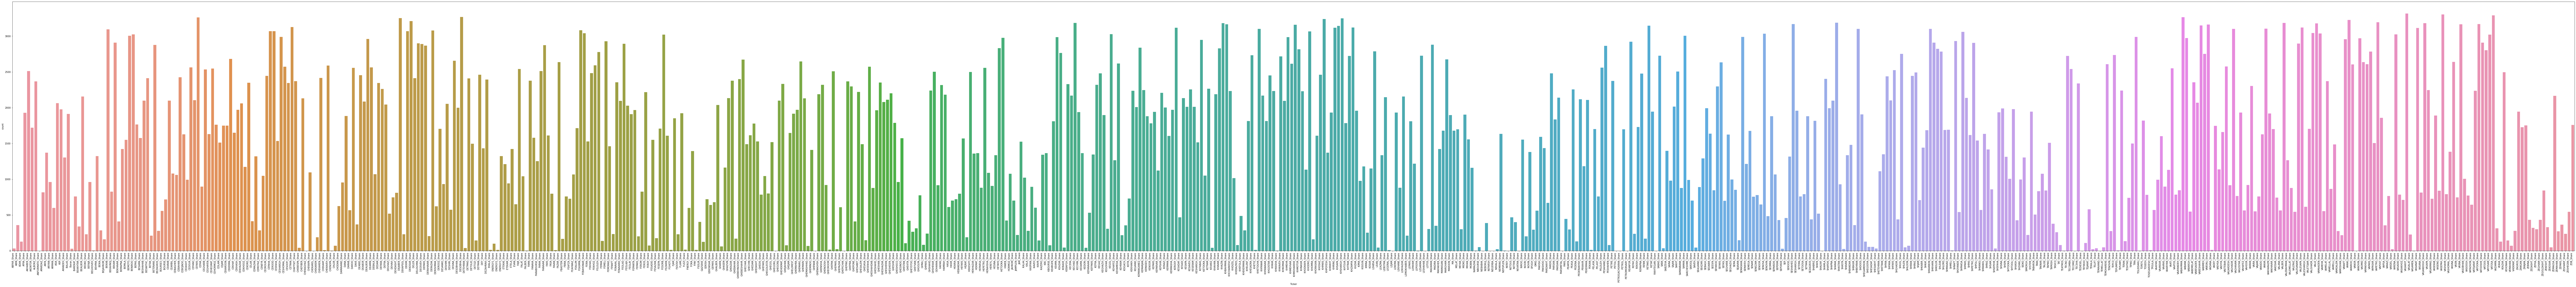

In [22]:
plt.figure(figsize=(200,20))
sb.countplot(x=data["Ticker"])
plt.xticks(rotation=90, ha='right');

Ten stocks are randomly selected and tested

In [23]:
np.random.seed(101)
random_num=list(np.random.randint(0,710,size=10))
random_tricker=[list_of_ticker[x] for x in random_num]

In [24]:
for stocke in random_tricker:
    num_of_stock=len(data[data.Ticker==stocke])
    print("We have %d  rows of %s data" %(num_of_stock,stocke))

We have 2750  rows of SHGOL_Share data
We have 2234  rows of KHCHARKESH_Share data
We have 579  rows of TEJARAT_Share data
We have 786  rows of VAATOS_Share data
We have 2572  rows of CESHOMAL_Share data
We have 2881  rows of MADARAN_Share data
We have 1315  rows of SHSPA_Share data
We have 277  rows of VAMOALEM_Share data
We have 579  rows of TEJARAT_Share data
We have 1942  rows of KEPARS_Share data


In [25]:
for stocke in random_tricker:
    x=data[data.Ticker==stocke].agg({"min","max","mean"}).drop(["Date","TIME","Per"],axis=1)
    display(x)

,Ticker,Open,High,Low,Close,Vol,Openint
max,SHGOL_Share,41000.000000,41000.000000,39005.000000,39253.000000,27793724.00,39252.000000
min,SHGOL_Share,7.110000,7.280000,7.040000,7.280000,1.00,1895.000000
mean,NaN,2567.078113,2611.956062,2502.813109,2558.323756,576294.44,8879.944727


,Ticker,Open,High,Low,Close,Vol,Openint
max,KHCHARKESH_Share,16877.000000,16877.000000,16511.000000,16511.000000,6.306719e+07,16206.000000
min,KHCHARKESH_Share,111.800000,114.900000,108.880000,114.900000,1.000000e+00,903.000000
mean,NaN,1418.924897,1447.055528,1382.625492,1411.511361,1.681302e+06,2481.163384


,Ticker,Open,High,Low,Close,Vol,Openint
max,TEJARAT_Share,7849.000000,7849.000000,7849.000000,7849.000000,2.109916e+07,7615.000000
min,TEJARAT_Share,352.460000,352.460000,352.460000,352.460000,5.000000e+02,500.000000
mean,NaN,1926.125164,1960.732608,1881.038031,1921.315613,1.541292e+06,2001.271157


,Ticker,Open,High,Low,Close,Vol,Openint
max,VAATOS_Share,17500.000000,17500.000000,17070.000000,17490.000000,7.467031e+06,17153.000000
min,VAATOS_Share,210.000000,210.000000,210.000000,210.000000,5.000000e+01,210.000000
mean,NaN,3911.544771,3989.259555,3777.947316,3889.076209,6.680091e+05,3894.558524


,Ticker,Open,High,Low,Close,Vol,Openint
max,CESHOMAL_Share,12466.000000,12466.000000,11991.00000,12337.000000,3.588064e+07,24332.000000
min,CESHOMAL_Share,125.990000,127.640000,67.33000,126.870000,2.000000e+00,850.000000
mean,NaN,984.983682,1001.725229,963.72348,983.653507,8.304951e+05,2805.403188


,Ticker,Open,High,Low,Close,Vol,Openint
max,MADARAN_Share,35020.000000,35020.00000,33353.000000,35020.000000,3.343157e+07,34445.000000
min,MADARAN_Share,23.790000,77.26000,23.790000,73.610000,1.400000e+01,681.000000
mean,NaN,2226.479299,2268.54269,2170.872933,2221.383155,1.227310e+06,3438.770566


,Ticker,Open,High,Low,Close,Vol,Openint
max,SHSPA_Share,25877.000000,25877.000000,23942.000000,24999.000000,8.857747e+07,53001.000000
min,SHSPA_Share,752.850000,778.230000,746.780000,746.780000,4.340000e+02,6390.000000
mean,NaN,3220.238251,3274.623141,3154.935399,3216.968548,2.520853e+06,13744.921673


,Ticker,Open,High,Low,Close,Vol,Openint
max,VAMOALEM_Share,13466.000000,13466.000000,12300.000000,12932.000000,7.500000e+07,12827.000000
min,VAMOALEM_Share,2682.540000,2682.540000,2682.540000,2682.540000,1.995320e+05,2700.000000
mean,NaN,5043.477076,5137.719061,4898.644477,5022.354513,6.199613e+06,5025.097473


,Ticker,Open,High,Low,Close,Vol,Openint
max,TEJARAT_Share,7849.000000,7849.000000,7849.000000,7849.000000,2.109916e+07,7615.000000
min,TEJARAT_Share,352.460000,352.460000,352.460000,352.460000,5.000000e+02,500.000000
mean,NaN,1926.125164,1960.732608,1881.038031,1921.315613,1.541292e+06,2001.271157


,Ticker,Open,High,Low,Close,Vol,Openint
max,KEPARS_Share,76000.000000,76000.000000,69970.000000,73468.000000,9.381742e+06,73143.000000
min,KEPARS_Share,205.470000,226.760000,205.470000,226.760000,1.000000e+00,983.000000
mean,NaN,5888.192039,5990.843841,5727.329938,5867.155613,2.924787e+05,8190.558187


#### Time and per 

In [26]:
data.TIME.unique()

array([0], dtype=int64)

In [27]:
data.TIME.value_counts(normalize=True)

0    1.0
Name: TIME, dtype: float64

In [28]:
data.Per.unique()

array(['d'], dtype=object)

In [29]:
data.Per.value_counts(normalize=True)

d    1.0
Name: Per, dtype: float64

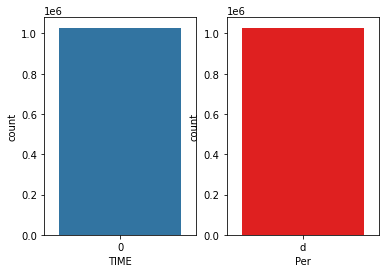

In [30]:
plt.subplot(121)
sb.countplot(data.TIME)

plt.subplot(122)
sb.countplot(data.Per,color="r");

In [31]:
data.drop(["Per","TIME"],axis=1,inplace=True)

In [32]:
data.head()

,Ticker,Open,High,Low,Close,Vol,Openint,Date
0,ABFAR_Share,867.65,867.65,867.65,867.65,100,1000,2006-02-27
1,ABFAR_Share,867.65,885.00,850.29,864.18,5710,996,2006-02-28
2,ABFAR_Share,847.69,847.69,847.69,847.69,13500,977,2006-04-30
3,ABFAR_Share,831.21,831.21,831.21,831.21,13500,958,2006-05-01
4,ABFAR_Share,814.72,814.72,814.72,814.72,13500,939,2006-05-02


In [33]:
data.columns

Index(['Ticker', 'Open', 'High', 'Low', 'Close', 'Vol', 'Openint', 'Date'], dtype='object')

#### Openint

In [34]:
data.Openint.agg({'min',"max","mean"})

max     1.271485e+06
mean    6.946608e+03
min     1.000000e+00
Name: Openint, dtype: float64

Find the stocks that have the lowest and highest openint values

In [35]:
data[(data.Openint==data.Openint.max()) | (data.Openint==data.Openint.min())]

,Ticker,Open,High,Low,Close,Vol,Openint,Date
616574,NEGERBA_Share,1.00,1.00,1.0,1.00,3021,1,2008-01-05
618235,NEREY_Share,1.00,1.00,1.0,1.00,5460000,1,2008-02-26
746030,SHETRAN_Share,4322.26,4322.26,4116.3,4131.41,70458,1271485,2013-10-19


In [36]:
openint_mean_max=len(data[data.Openint>=data.Openint.mean()])
print("%d rows have openint value greater than the average value"%(openint_mean_max))

270405 rows have openint value greater than the average value


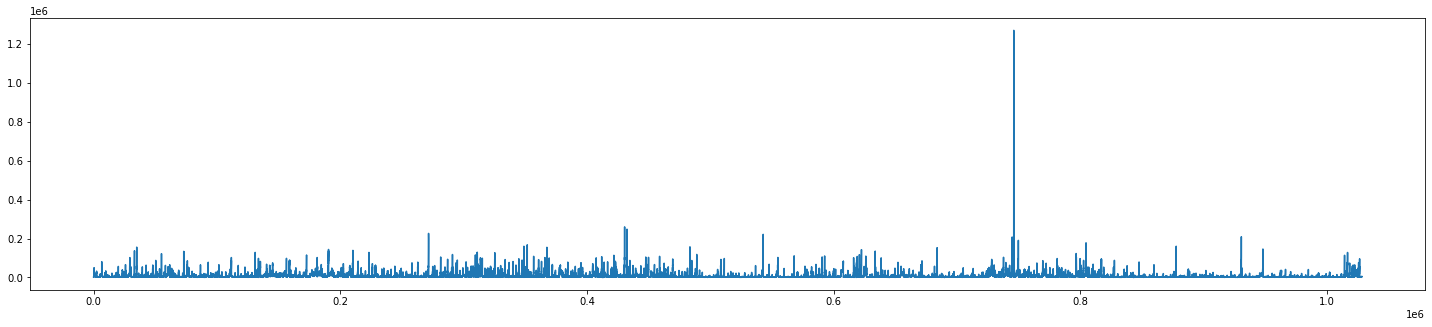

In [37]:
plt.figure(figsize=(25,5))
plt.plot(data.Openint)

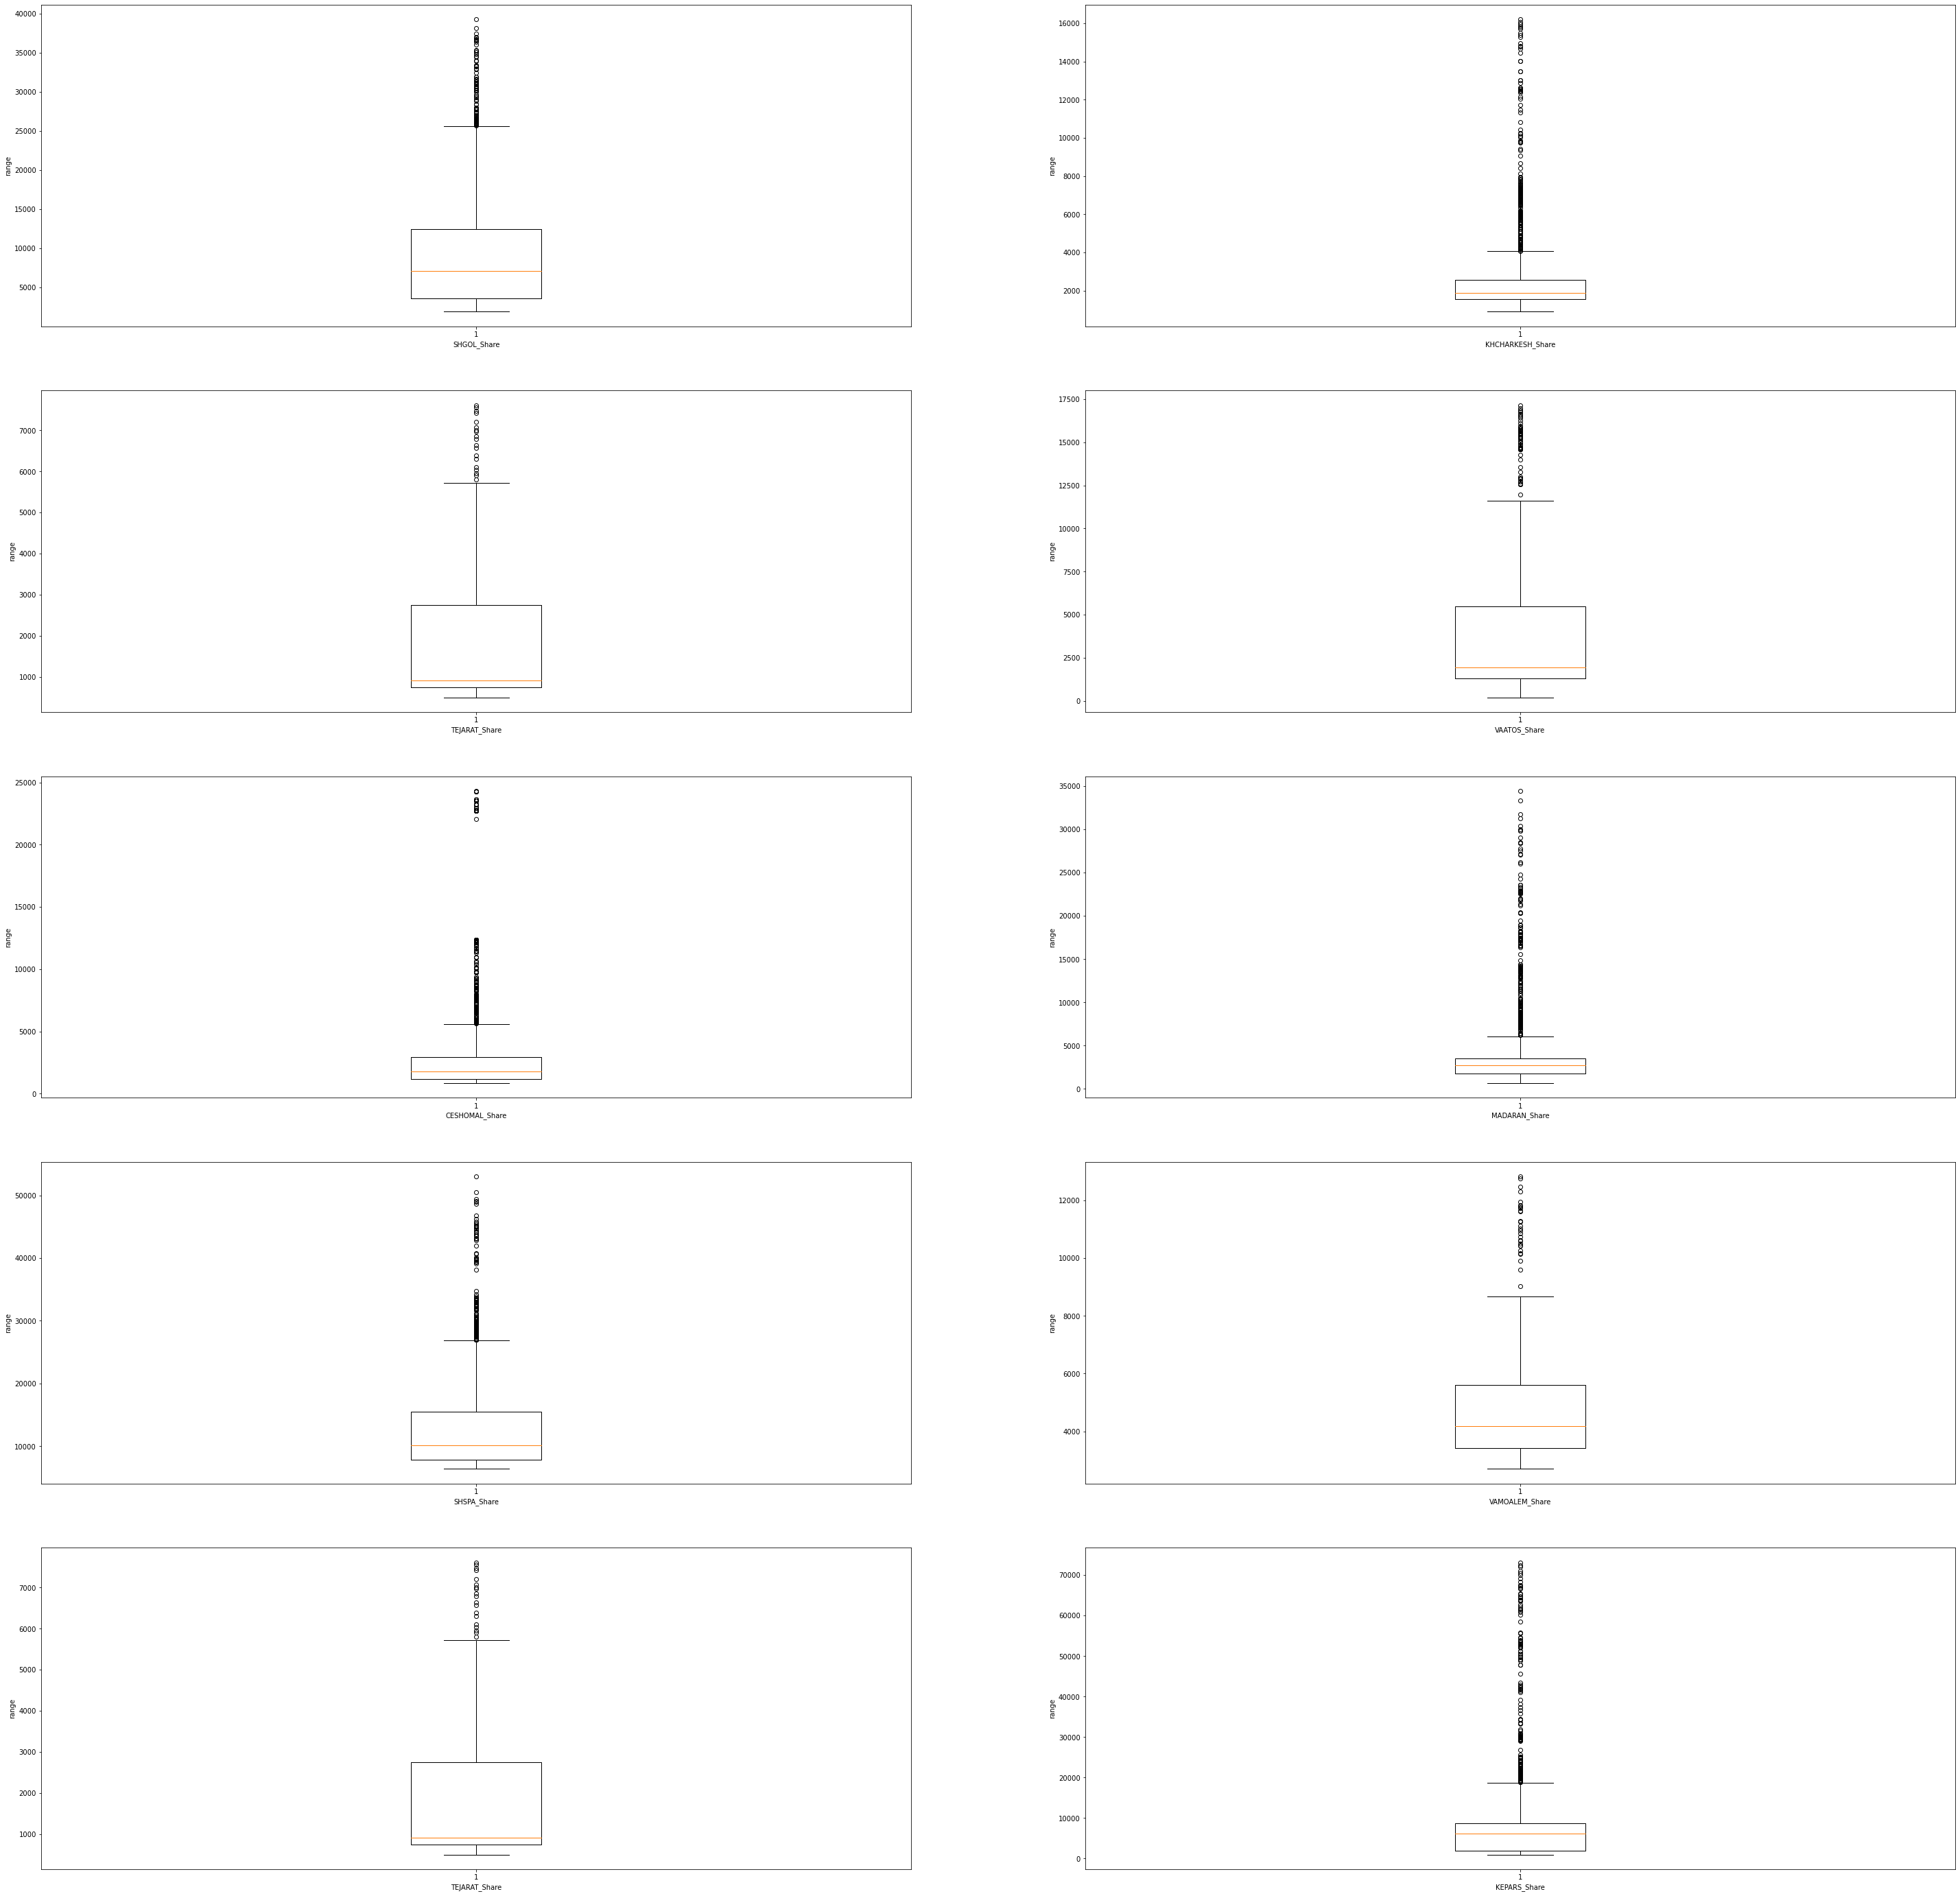

In [38]:
plt.figure(figsize=(50,50))
i=1
for stocke in random_tricker:
    plt.subplot(5,2,i)
    plt.boxplot(data[data.Ticker==stocke].Openint.values)
    plt.xlabel(stocke)
    plt.ylabel("range")
    i+=1

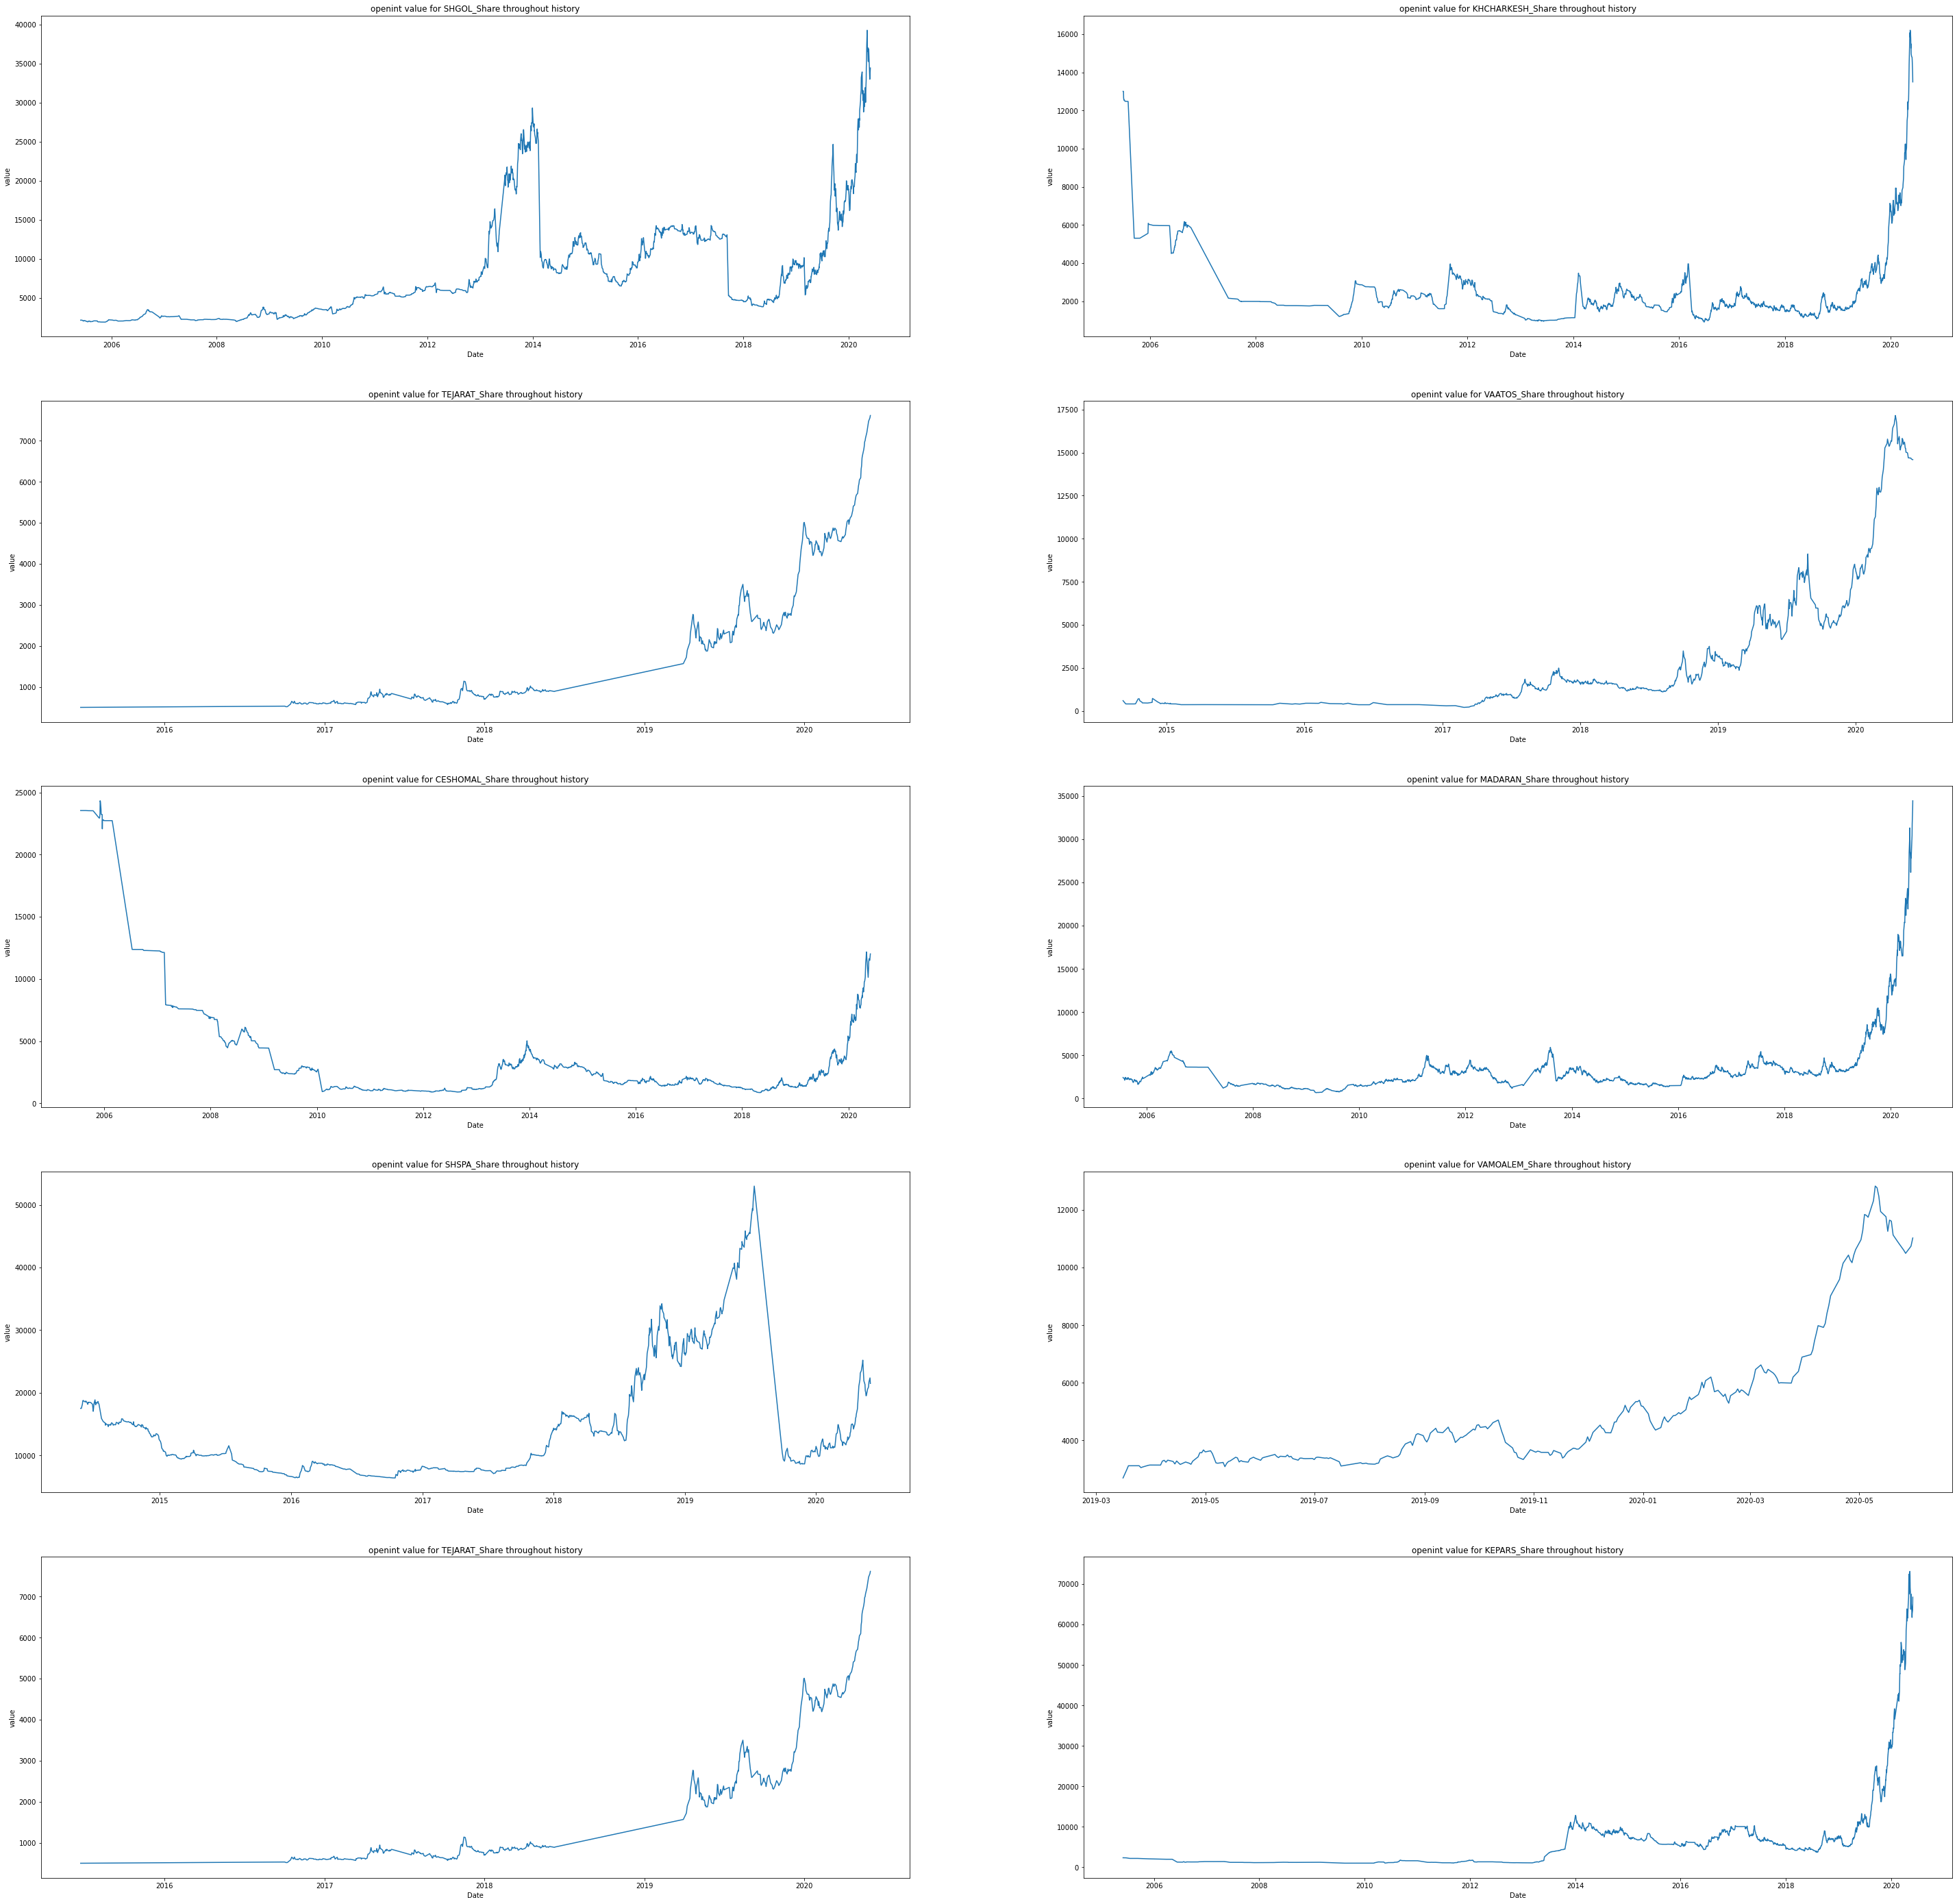

In [39]:
plt.figure(figsize=(50,50))
i=1
for stocke in random_tricker:
    plt.subplot(5,2,i)
    plt.plot(data[data.Ticker==stocke].Date,data[data.Ticker==stocke].Openint.values)
    plt.xlabel('Date')
    plt.ylabel("value")
    plt.title("openint value for %s throughout history"%(stocke))
    i+=1


open

In [40]:
open_min=data.Open.min()
open_max=data.Open.max()
data[(data.Open==open_min)| (data.Open==open_max)]

,Ticker,Open,High,Low,Close,Vol,Openint,Date
430518,KEDAMA_Share,260106.00,260106.00,260106.00,260106.00,455367,260106,2020-05-31
523154,KHKAVEH_Share,-3990.78,-3990.78,-3864.83,-3905.18,126022,6387,2005-09-21


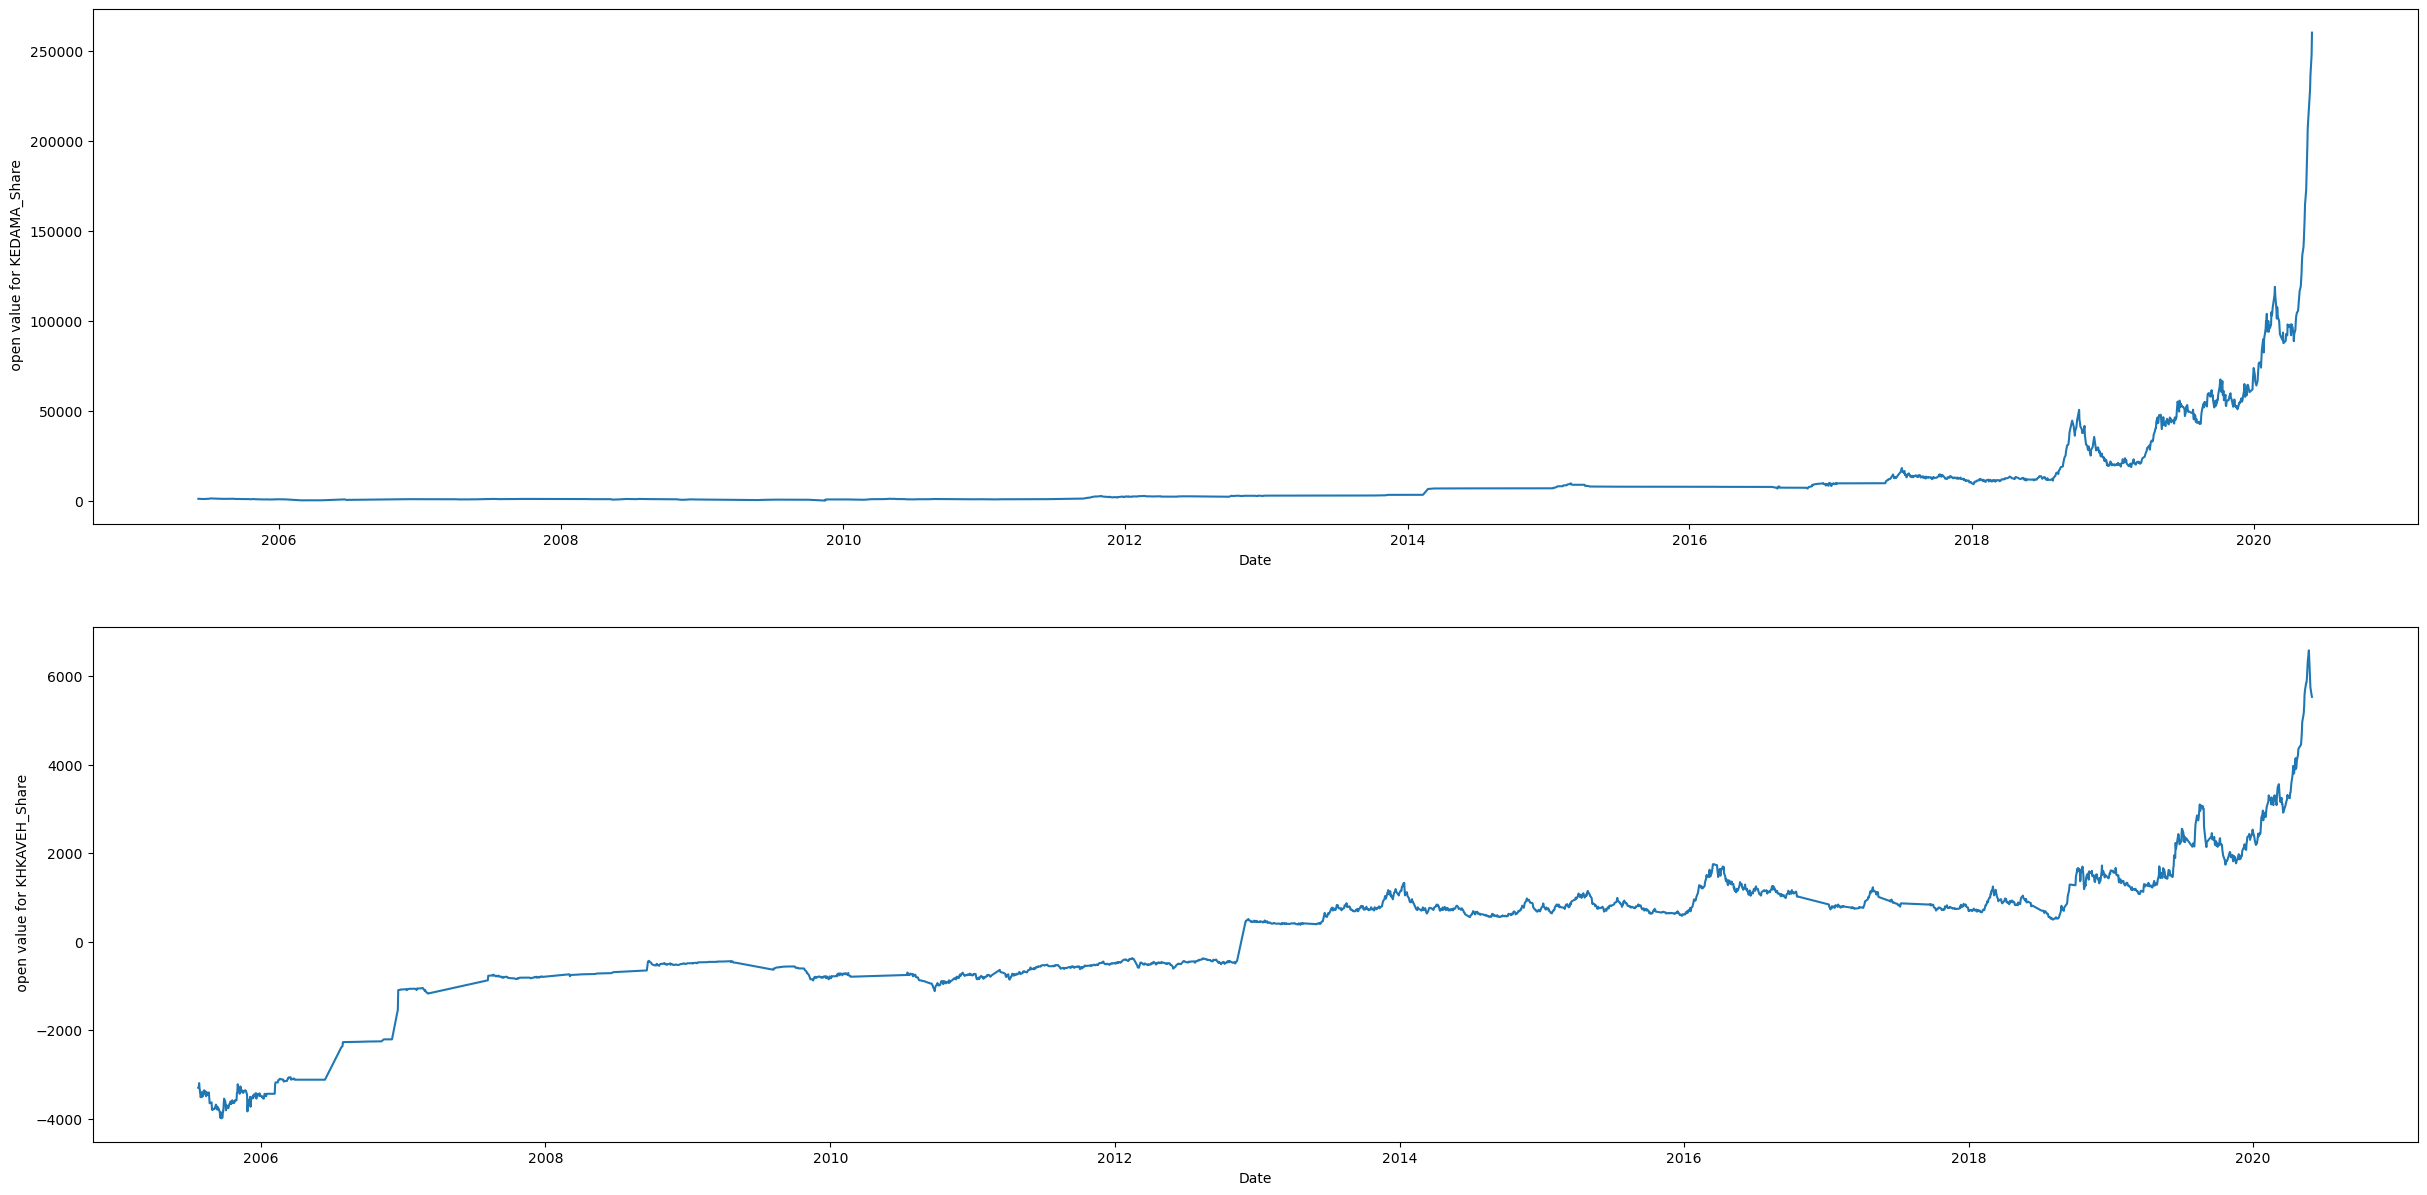

In [41]:
min_max_open=["KEDAMA_Share","KHKAVEH_Share"]
i=1
plt.figure(figsize=(30,15),dpi=100)
for stock in min_max_open:
    plt.subplot(2,1,i)
    plt.plot(data[data.Ticker==stock].Date.values,data[data.Ticker==stock].Open.values)
    plt.xlabel('Date')
    plt.ylabel(" open value for %s"%(stock))
    i+=1

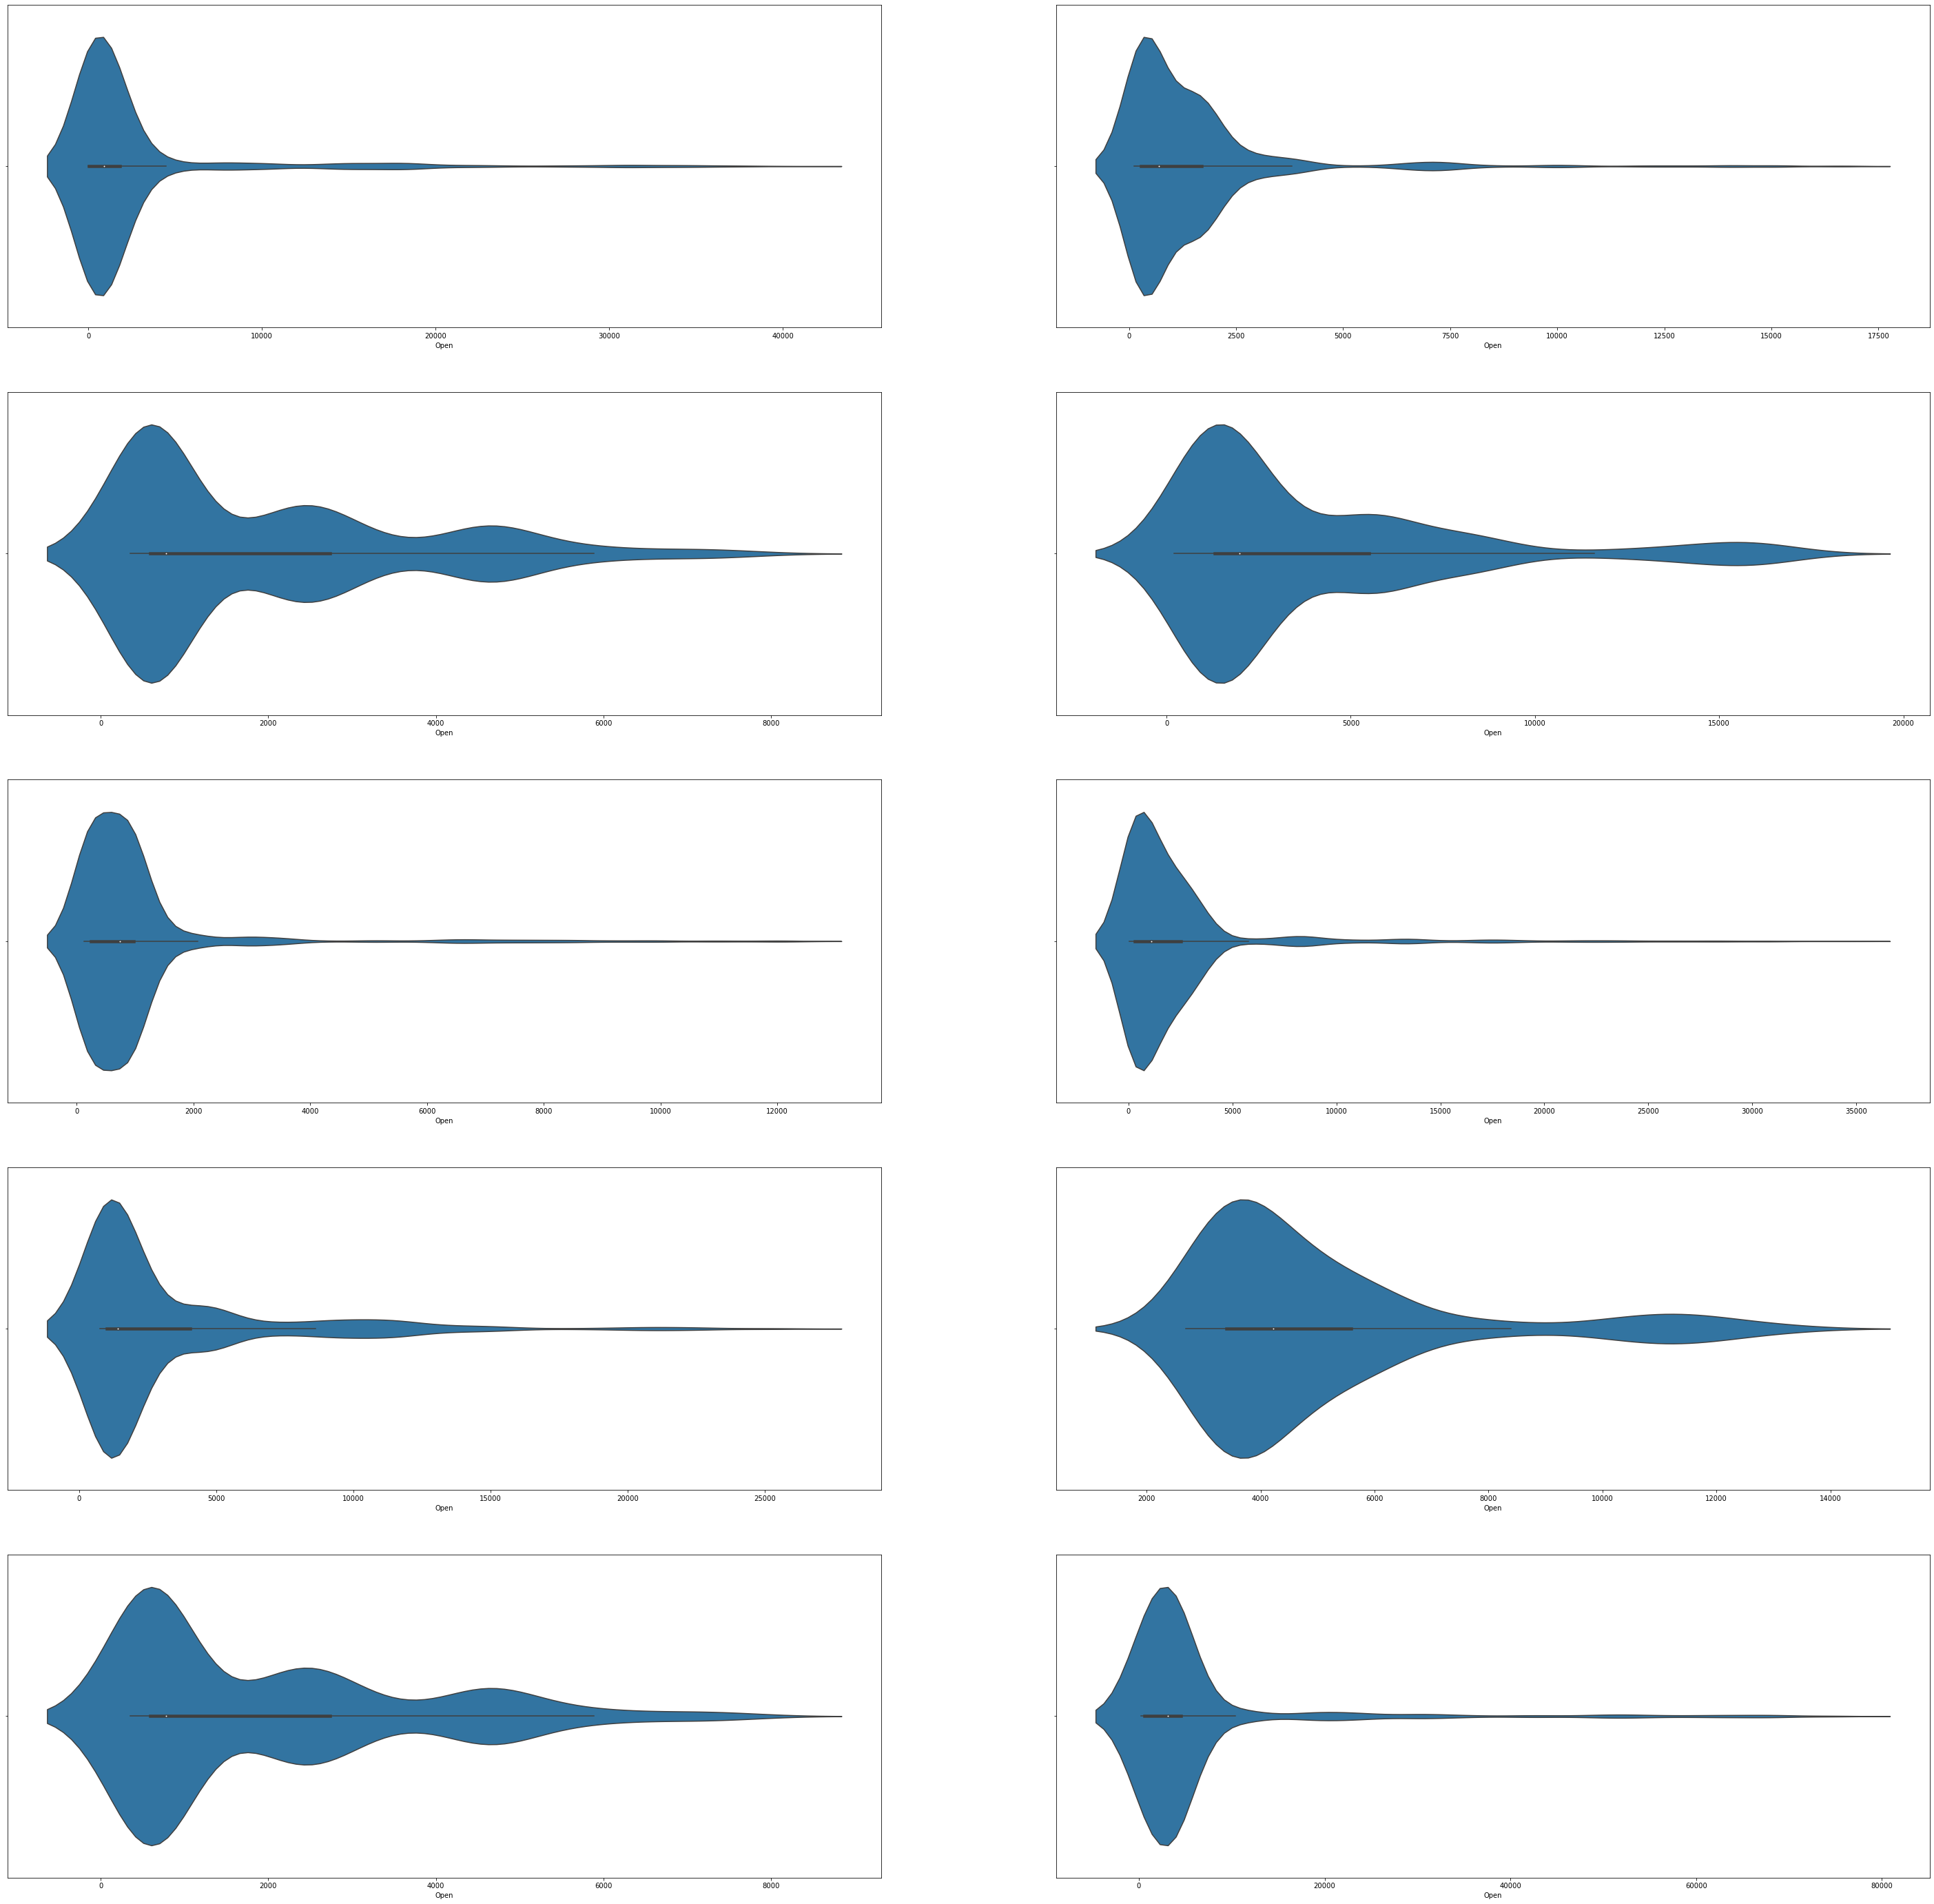

In [42]:
plt.figure(figsize=(50,50))
i=1
for stocke in random_tricker:
    plt.subplot(5,2,i)
    sb.violinplot(data[data.Ticker==stocke].Open)
    i+=1

High

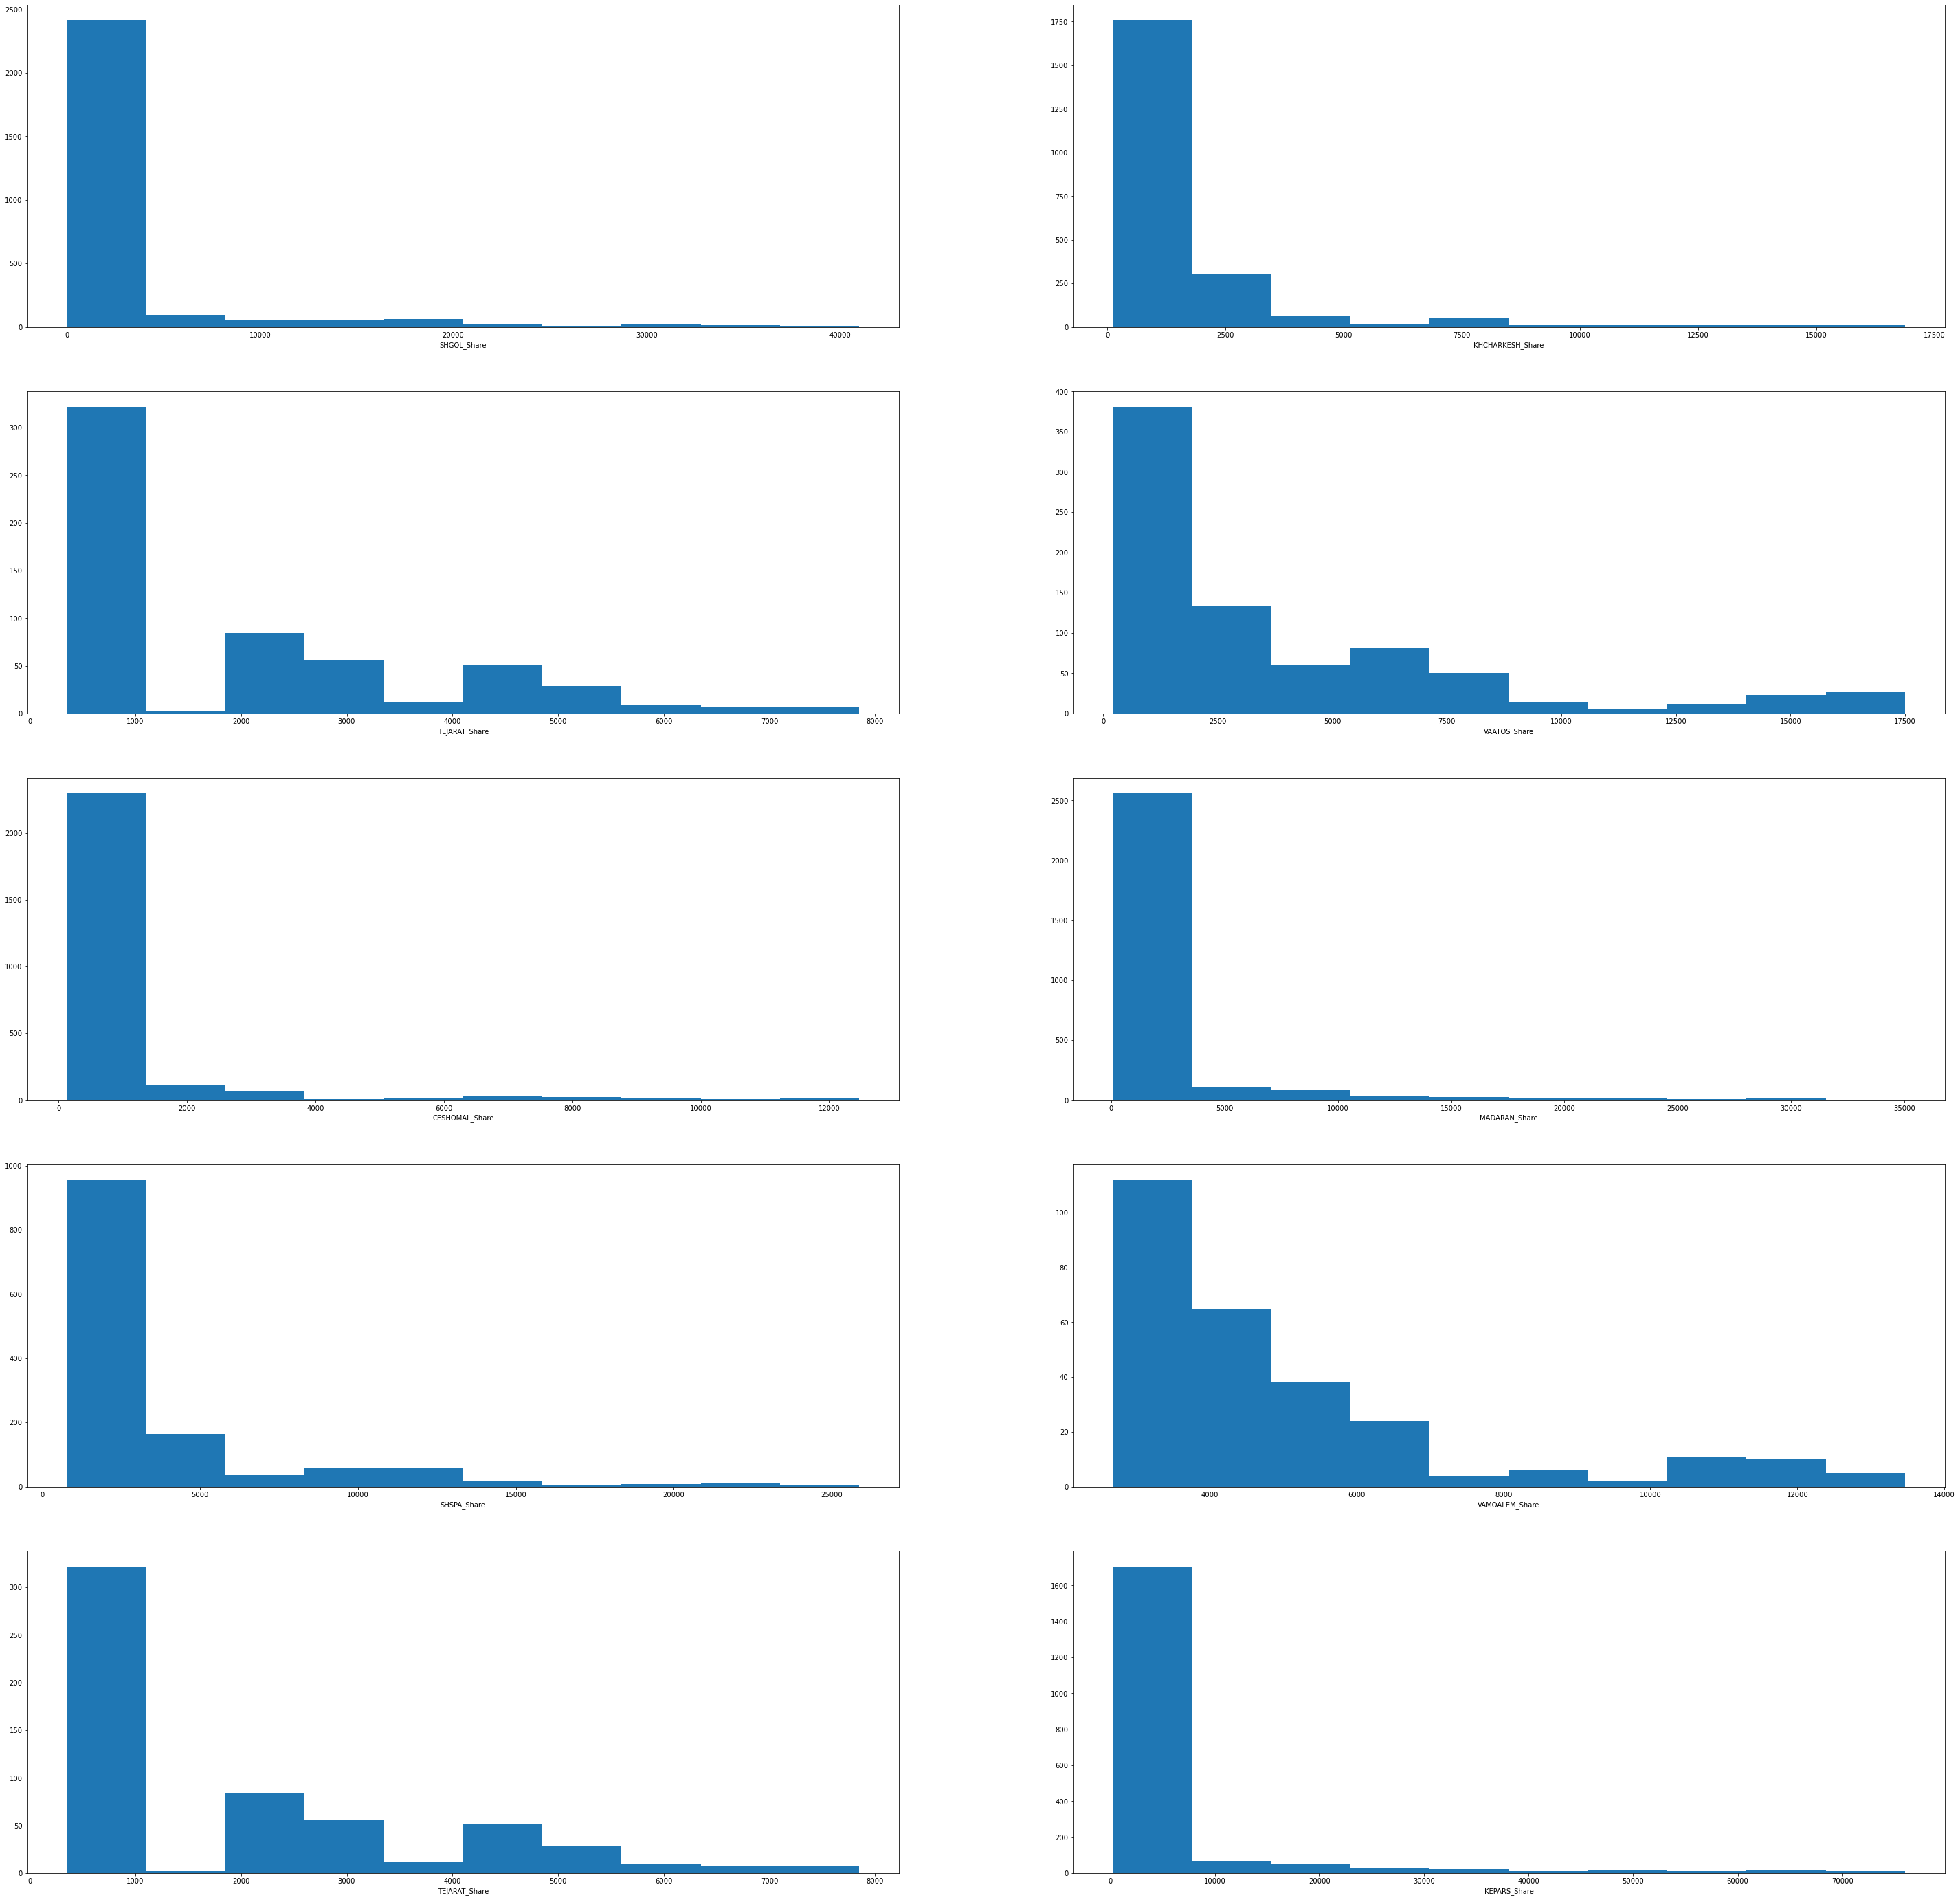

In [43]:
plt.figure(figsize=(50,50))
i=1
for stocke in random_tricker:
    plt.subplot(5,2,i)
    plt.hist(data[data.Ticker==stocke].High)
    plt.xlabel(stocke)
    i+=1

Close

In [44]:
data.Close.agg({"min","max","mean"})

max     260106.000000
mean      3831.998887
min      -4031.140000
Name: Close, dtype: float64

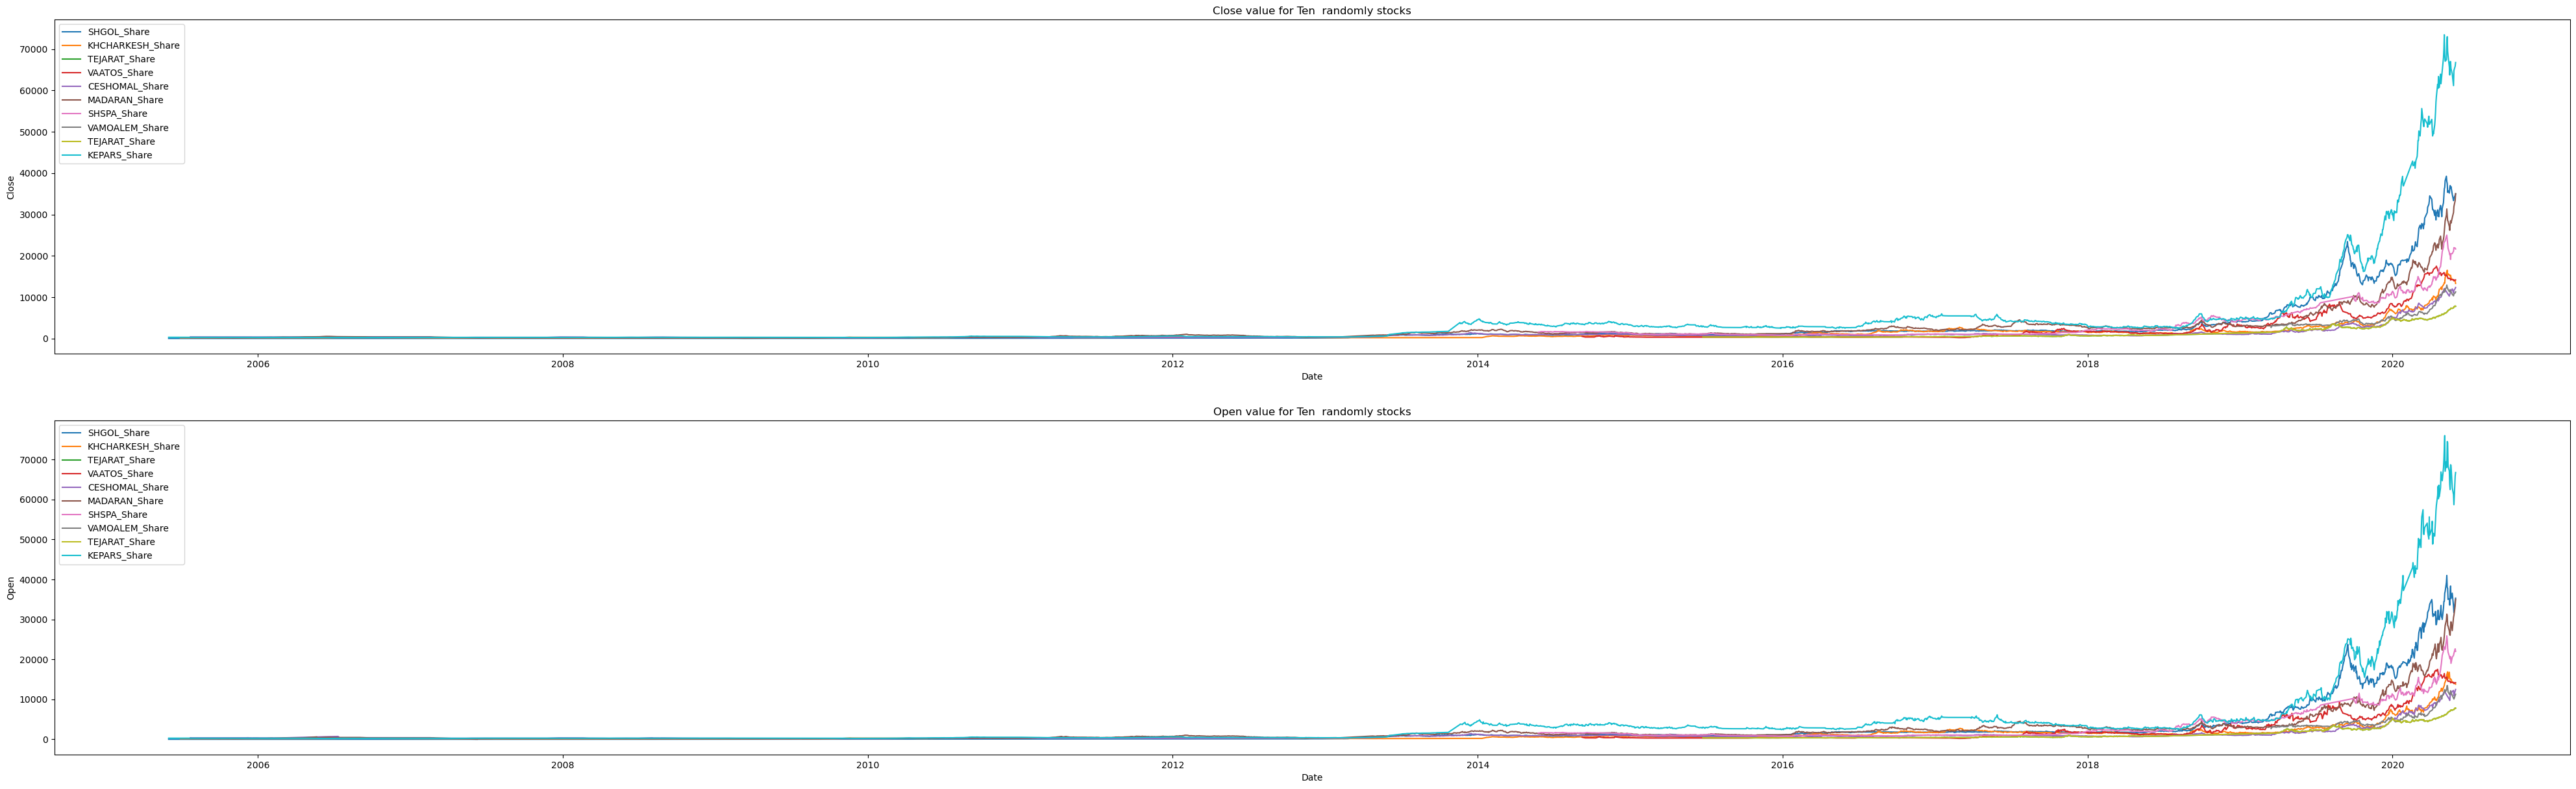

In [45]:
plt.figure(figsize=(50,15),dpi=100)
plt.subplot(211)
for stocke in random_tricker:
    plt.plot(data[data.Ticker==stocke].Date,data[data.Ticker==stocke].Close.values)
plt.legend(random_tricker)
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Close value for Ten  randomly stocks");

plt.subplot(212)
for stocke in random_tricker:
    plt.plot(data[data.Ticker==stocke].Date,data[data.Ticker==stocke].Open.values)
plt.legend(random_tricker)
plt.xlabel("Date")
plt.ylabel("Open")
plt.title("Open value for Ten  randomly stocks");



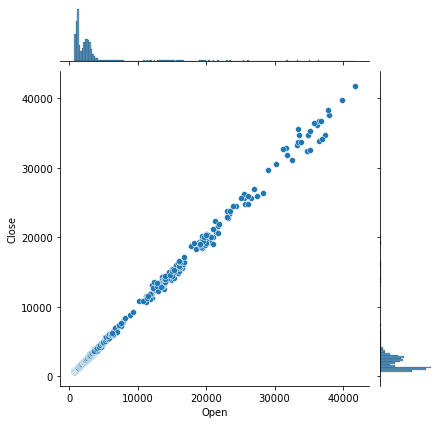

In [46]:
#VASAKHT_Share  have   3316 row
stocke="VASAKHT_Share"
sb.jointplot(data[data.Ticker==stocke].Open,data[data.Ticker==stocke].Close)

<AxesSubplot:>

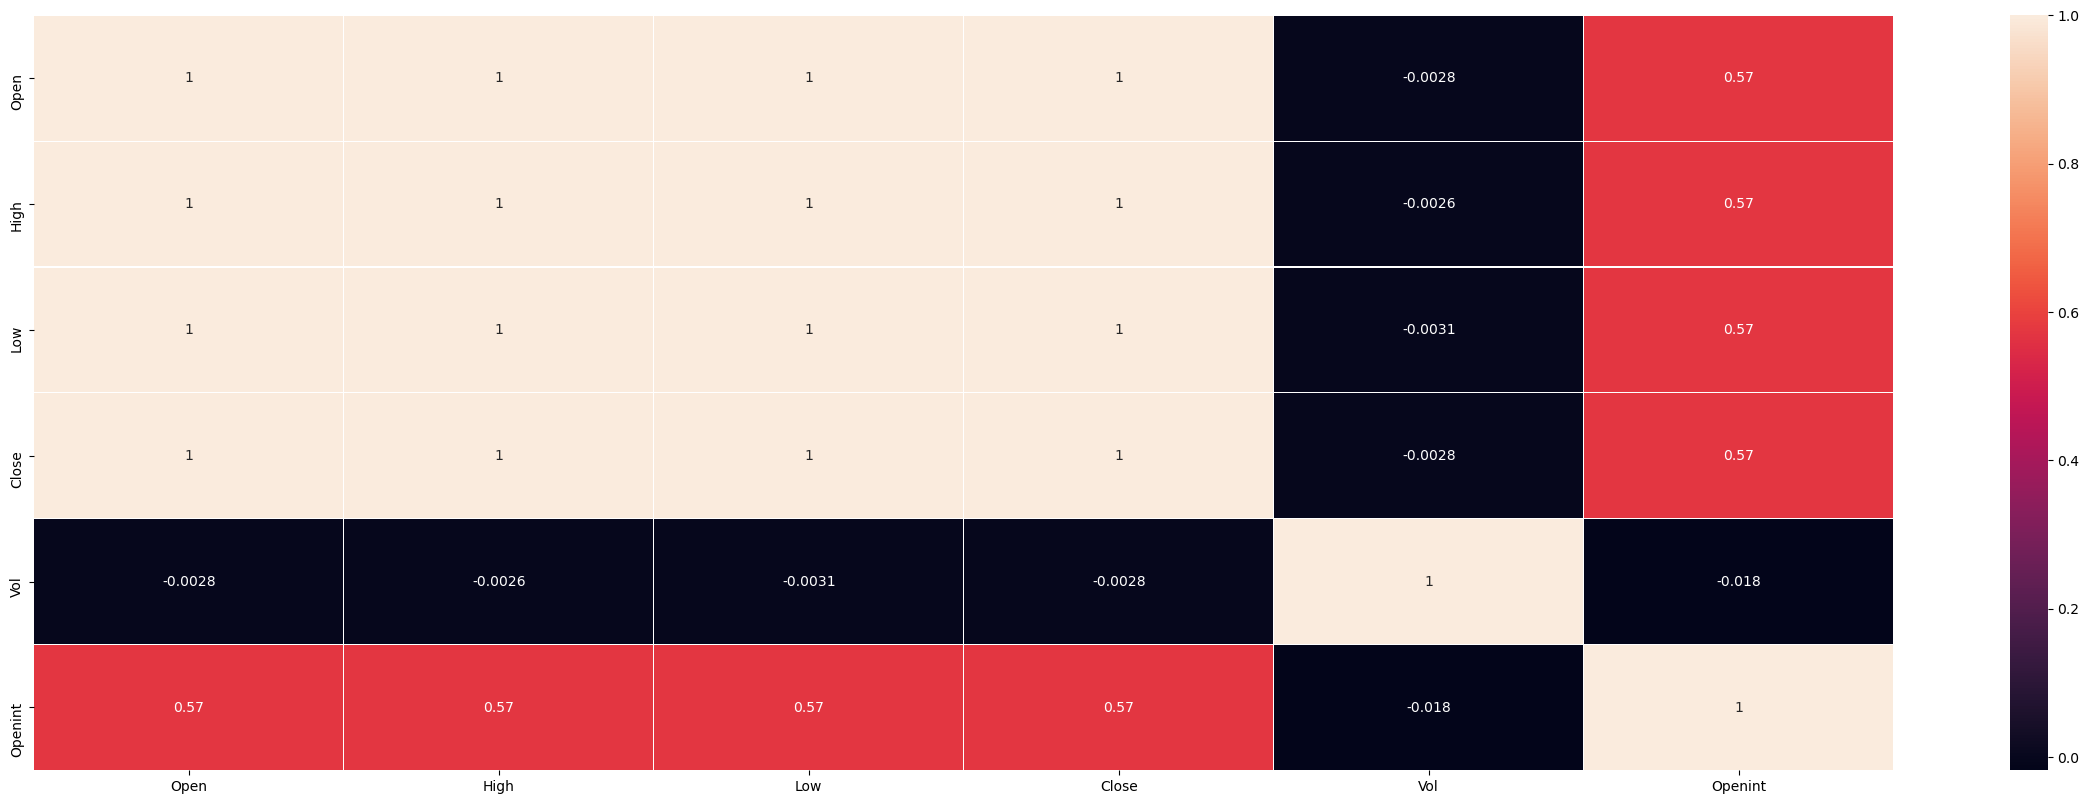

In [47]:
plt.figure(figsize=(30,10),dpi=100)
sb.heatmap(data.corr(),annot=True,linewidths=0.1)

In [48]:
data.columns

Index(['Ticker', 'Open', 'High', 'Low', 'Close', 'Vol', 'Openint', 'Date'], dtype='object')

#### Hierarchical index 

In [49]:
index=list(zip(data.Ticker,data.Date))
data.index=pd.MultiIndex.from_tuples(index,names=("Ticker","Date"))
data.drop(["Date","Ticker"],axis=1, inplace=True)

In [50]:
data.head()

Open    High     Low   Close    Vol  Openint
Ticker      Date                                                      
ABFAR_Share 2006-02-27  867.65  867.65  867.65  867.65    100     1000
            2006-02-28  867.65  885.00  850.29  864.18   5710      996
            2006-04-30  847.69  847.69  847.69  847.69  13500      977
            2006-05-01  831.21  831.21  831.21  831.21  13500      958
            2006-05-02  814.72  814.72  814.72  814.72  13500      939

#### model

Create Clustering

In [51]:
inertia_list=list()
score_list=list()

for k in range(3,10):
    kmn=KMeans(n_clusters=k)
    kmn.fit(data)
    label=kmn.labels_
    inertia_list.append(kmn.inertia_)
    score=silhouette_score(data,label,metric='euclidean',sample_size=5000)
    score_list.append(score)

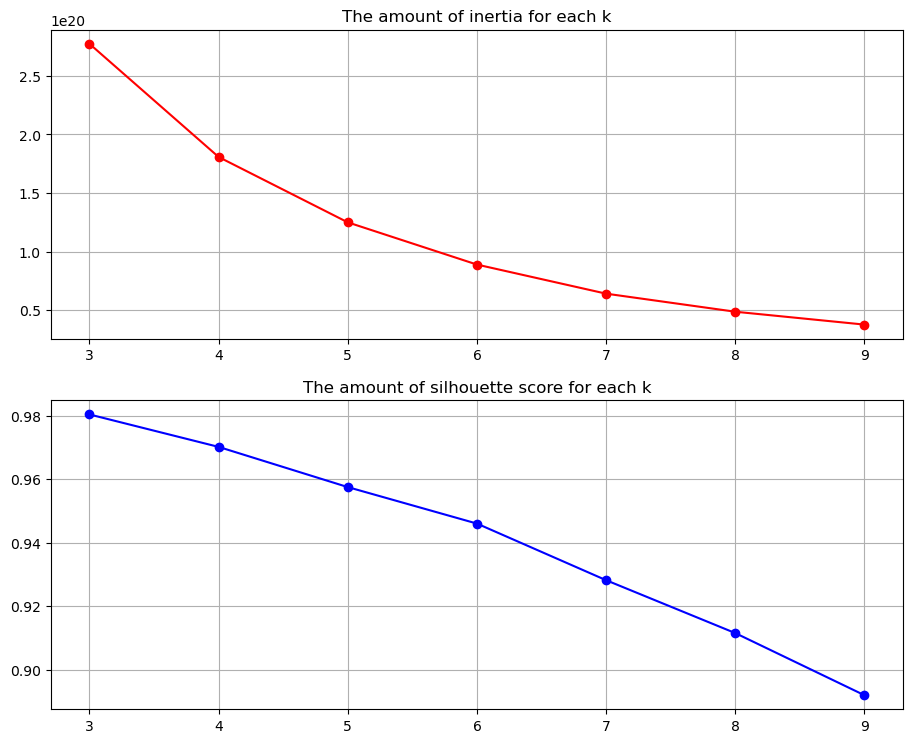

In [52]:
plt.figure(figsize=(11,9),dpi=100)
plt.subplot(211)
plt.plot(range(3,10),inertia_list,"ro-")
plt.title("The amount of inertia for each k")
plt.grid()
plt.subplot(212)
plt.plot(range(3,10),score_list,"bo-")
plt.title("The amount of silhouette score for each k")

plt.grid()

In [53]:
kmn=KMeans(n_clusters=5)
label=kmn.fit_predict(data)

<AxesSubplot:xlabel='Cluster', ylabel='count'>

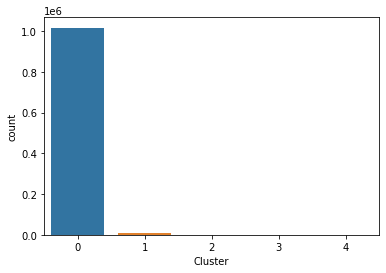

In [54]:
data["Cluster"]=label
sb.countplot("Cluster",data=data)

In [55]:
data.Cluster.value_counts()

0    1016718
1      10341
4        964
2        134
3         19
Name: Cluster, dtype: int64

<AxesSubplot:xlabel='Open', ylabel='Close'>

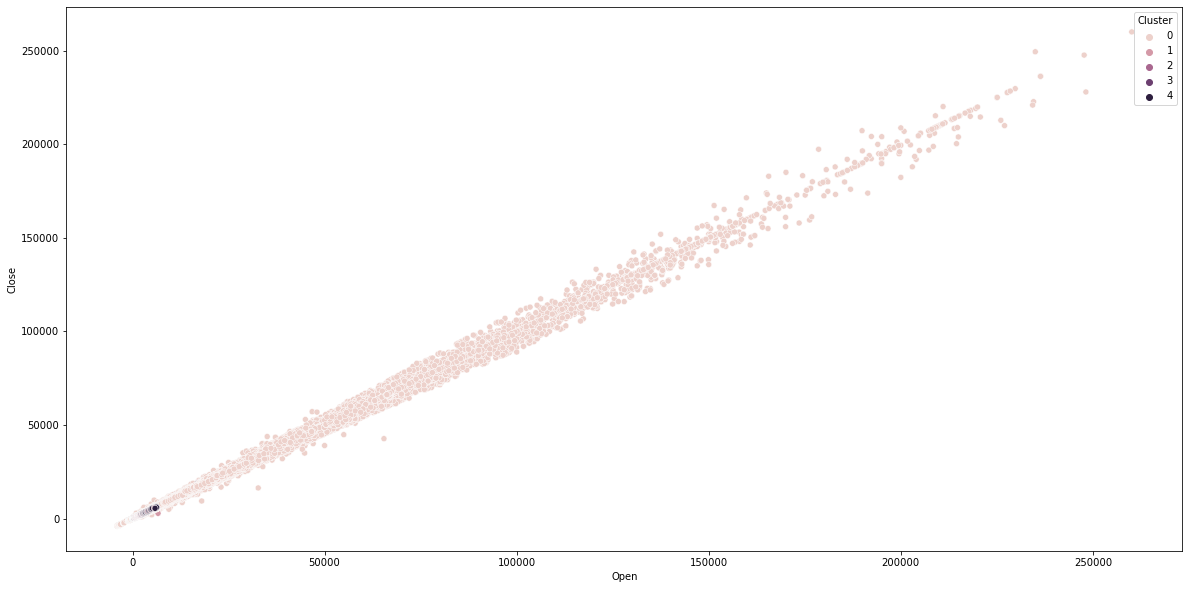

In [56]:
plt.figure(figsize=(20,10))
sb.scatterplot(x="Open",y="Close",hue="Cluster",data=data)

<AxesSubplot:xlabel='High', ylabel='Vol'>

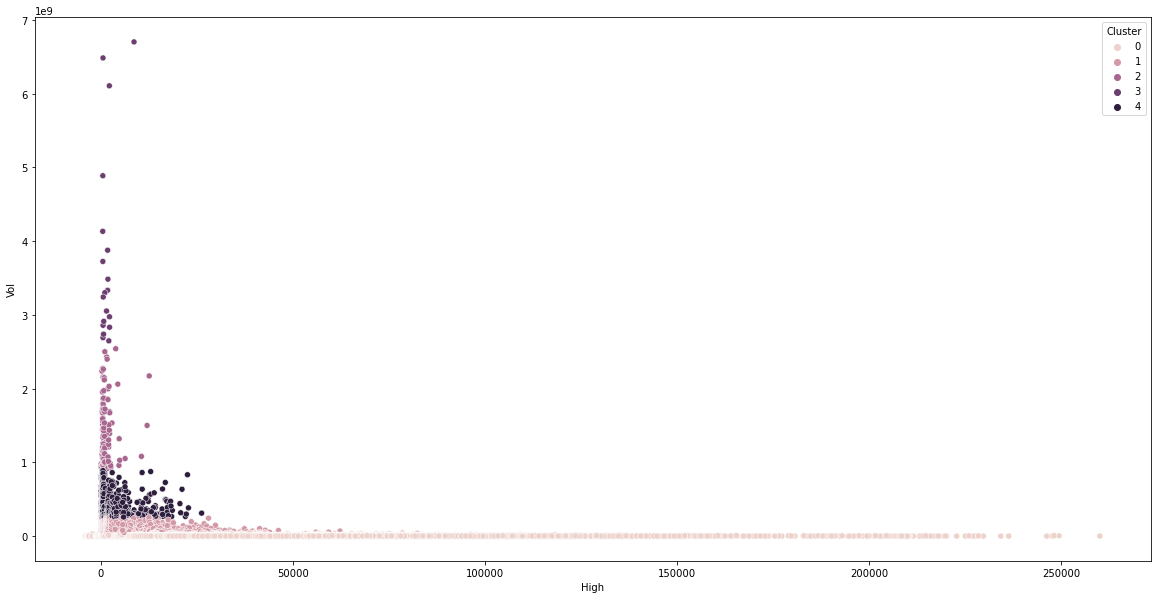

In [57]:
plt.figure(figsize=(20,10))
sb.scatterplot("High","Vol",hue="Cluster",data=data)

<AxesSubplot:xlabel='Date', ylabel='Vol'>

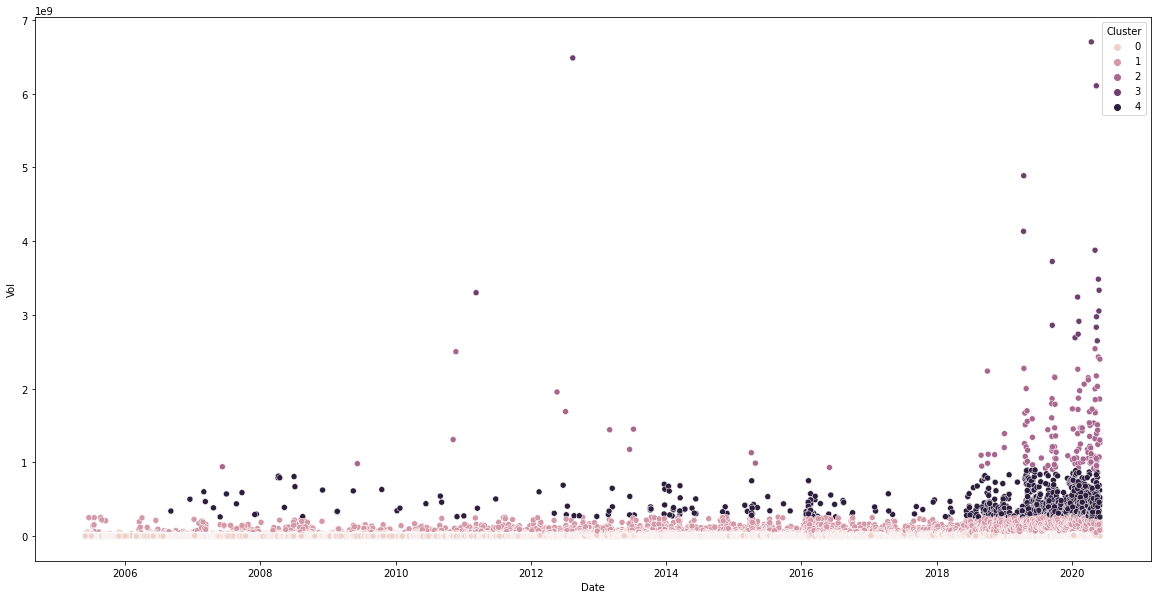

In [58]:
plt.figure(figsize=(20,10))
sb.scatterplot("Date","Vol",hue="Cluster",data=data)

<AxesSubplot:>

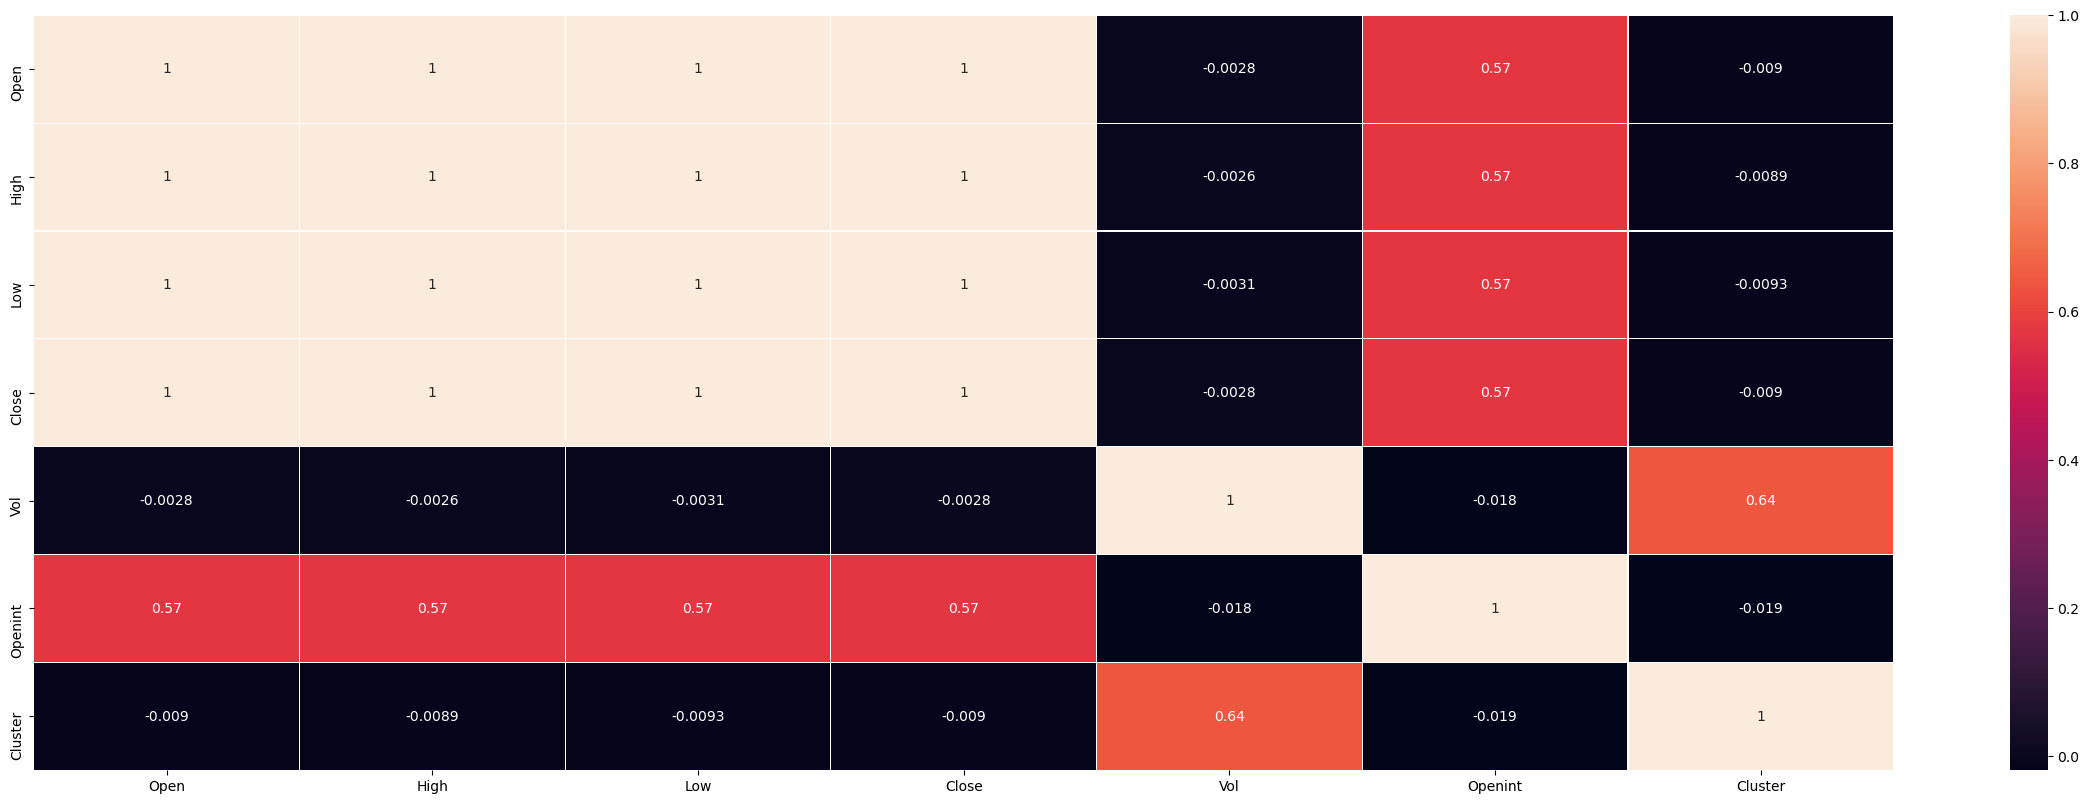

In [59]:
plt.figure(figsize=(30,10),dpi=100)
sb.heatmap(data.corr(),annot=True,linewidths=0.1)

In [60]:
data.groupby("Cluster").agg({"min","max","mean"})

Open                             High                        \
               max         mean      min        max         mean      min   
Cluster                                                                     
0        260106.00  3853.857579 -3990.78  260106.00  3917.753152 -4088.00   
1         62227.00  3052.851066    12.12   62227.00  3120.011201    12.48   
2         12553.00  1335.162313    41.13   12553.00  1357.454851    41.13   
3          8600.00  1550.085263   454.00    8600.00  1572.506316   454.00   
4         26195.88  2507.688423    17.80   26195.88  2569.749803    17.80   

               Low                            Close                        \
               max         mean      min        max         mean      min   
Cluster                                                                     
0        260106.00  3765.883664 -3973.66  260106.00  3841.578610 -4031.14   
1         60415.00  2962.401118    12.04   62227.00  3050.861867    12.28   
2         12000.00  1279.121194    40.37   12553.00  1323.215597    40.37   
3          8600.00  1506.822105   450.00    8600.00  1535.927368   454.00   
4         26195.88  2425.184616    17.80   26195.88  2501.773724    17.80   

                Vol                            Openint                    
                max          mean         min      max         mean  min  
Cluster                                                                   
0          47580817  1.941279e+06           0  1271485  6983.041018    1  
1         257670971  9.315106e+07    47595204    62211  3814.465719  319  
2        2540260831  1.372820e+09   905225244    12324  1451.686567  405  
3        6699987426  3.787520e+09  2647125894     8600  1571.263158  454  
4         897133044  4.223190e+08   258103510    31250  2990.219917    5

In [61]:
data.reset_index(inplace=True)
data.set_index("Ticker",drop=True,inplace=True)
data.head()

,Date,Open,High,Low,Close,Vol,Openint,Cluster
Ticker,,,,,,,,
ABFAR_Share,2006-02-27,867.65,867.65,867.65,867.65,100,1000,0
ABFAR_Share,2006-02-28,867.65,885.00,850.29,864.18,5710,996,0
ABFAR_Share,2006-04-30,847.69,847.69,847.69,847.69,13500,977,0
ABFAR_Share,2006-05-01,831.21,831.21,831.21,831.21,13500,958,0
ABFAR_Share,2006-05-02,814.72,814.72,814.72,814.72,13500,939,0


In [62]:
Ticker_in_cluster_0=list(data[data["Cluster"]==0].index.unique())
Ticker_in_cluster_1=list(data[data["Cluster"]==1].index.unique())
Ticker_in_cluster_2=list(data[data["Cluster"]==2].index.unique())
Ticker_in_cluster_3=list(data[data["Cluster"]==3].index.unique())
Ticker_in_cluster_4=list(data[data["Cluster"]==4].index.unique())

Build regression model on cluster data zero

In [63]:
cluster_one=data[data.Cluster==1]

In [64]:
cluster_one.shape

(10341, 8)

In [65]:
cluster_one.head()

,Date,Open,High,Low,Close,Vol,Openint,Cluster
Ticker,,,,,,,,
AKHABER_Share,2008-08-09,199.63,199.63,199.63,199.63,230300000,1500,1
AKHABER_Share,2008-08-10,205.61,205.61,205.61,205.61,64168880,1545,1
AKHABER_Share,2008-08-19,215.20,220.25,208.67,212.27,51973731,1595,1
AKHABER_Share,2008-08-31,228.64,228.64,227.57,228.50,203253899,1717,1
AKHABER_Share,2008-09-01,232.90,235.29,229.84,234.89,48361658,1765,1


In [66]:
cluster_one.tail()

,Date,Open,High,Low,Close,Vol,Openint,Cluster
Ticker,,,,,,,,
ZOB_Share,2020-04-28,4608.0,4608.0,4550.0,4608.0,166200246,4604,1
ZOB_Share,2020-05-11,5977.0,5977.0,5977.0,5977.0,47622758,5977,1
ZOB_Share,2020-05-16,6170.0,6180.0,5830.0,5830.0,153801337,5948,1
ZOB_Share,2020-05-26,5430.0,5662.0,5428.0,5428.0,155613030,5462,1
ZOB_Share,2020-05-30,5632.0,5632.0,5533.0,5632.0,78834060,5627,1


In [67]:
cluster_one.describe()

,Open,High,Low,Close,Vol,Openint,Cluster
count,10341.000000,10341.000000,10341.000000,10341.000000,1.034100e+04,10341.000000,10341.0
mean,3052.851066,3120.011201,2962.401118,3050.861867,9.315106e+07,3814.465719,1.0
std,4204.474918,4292.182106,4056.438367,4186.715687,4.740208e+07,4196.212332,0.0
min,12.120000,12.480000,12.040000,12.280000,4.759520e+07,319.000000,1.0
25%,743.920000,758.970000,726.110000,744.600000,5.806602e+07,1375.000000,1.0
50%,1620.000000,1653.000000,1577.000000,1616.000000,7.556329e+07,2421.000000,1.0
75%,3479.510000,3554.000000,3390.000000,3495.000000,1.114082e+08,4458.000000,1.0
max,62227.000000,62227.000000,60415.000000,62227.000000,2.576710e+08,62211.000000,1.0


In [68]:
cluster_one.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10341 entries, AKHABER_Share to ZOB_Share
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     10341 non-null  datetime64[ns]
 1   Open     10341 non-null  float64       
 2   High     10341 non-null  float64       
 3   Low      10341 non-null  float64       
 4   Close    10341 non-null  float64       
 5   Vol      10341 non-null  int64         
 6   Openint  10341 non-null  int64         
 7   Cluster  10341 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(2)
memory usage: 646.3+ KB


In [69]:
len_cluster_one_Ticker=len(cluster_one.index.unique())
print("There  are  %d  tickers in  cluster  number  one"%(len_cluster_one_Ticker))

There  are  276  tickers in  cluster  number  one


In [70]:
Subscription=len(np.intersect1d(Ticker_in_cluster_0,Ticker_in_cluster_1))
print("The two one-zero clusters have  %d  common shares"%(Subscription))

The two one-zero clusters have  275  common shares


In [71]:
cluster_one.drop("Cluster",axis=1, inplace=True)

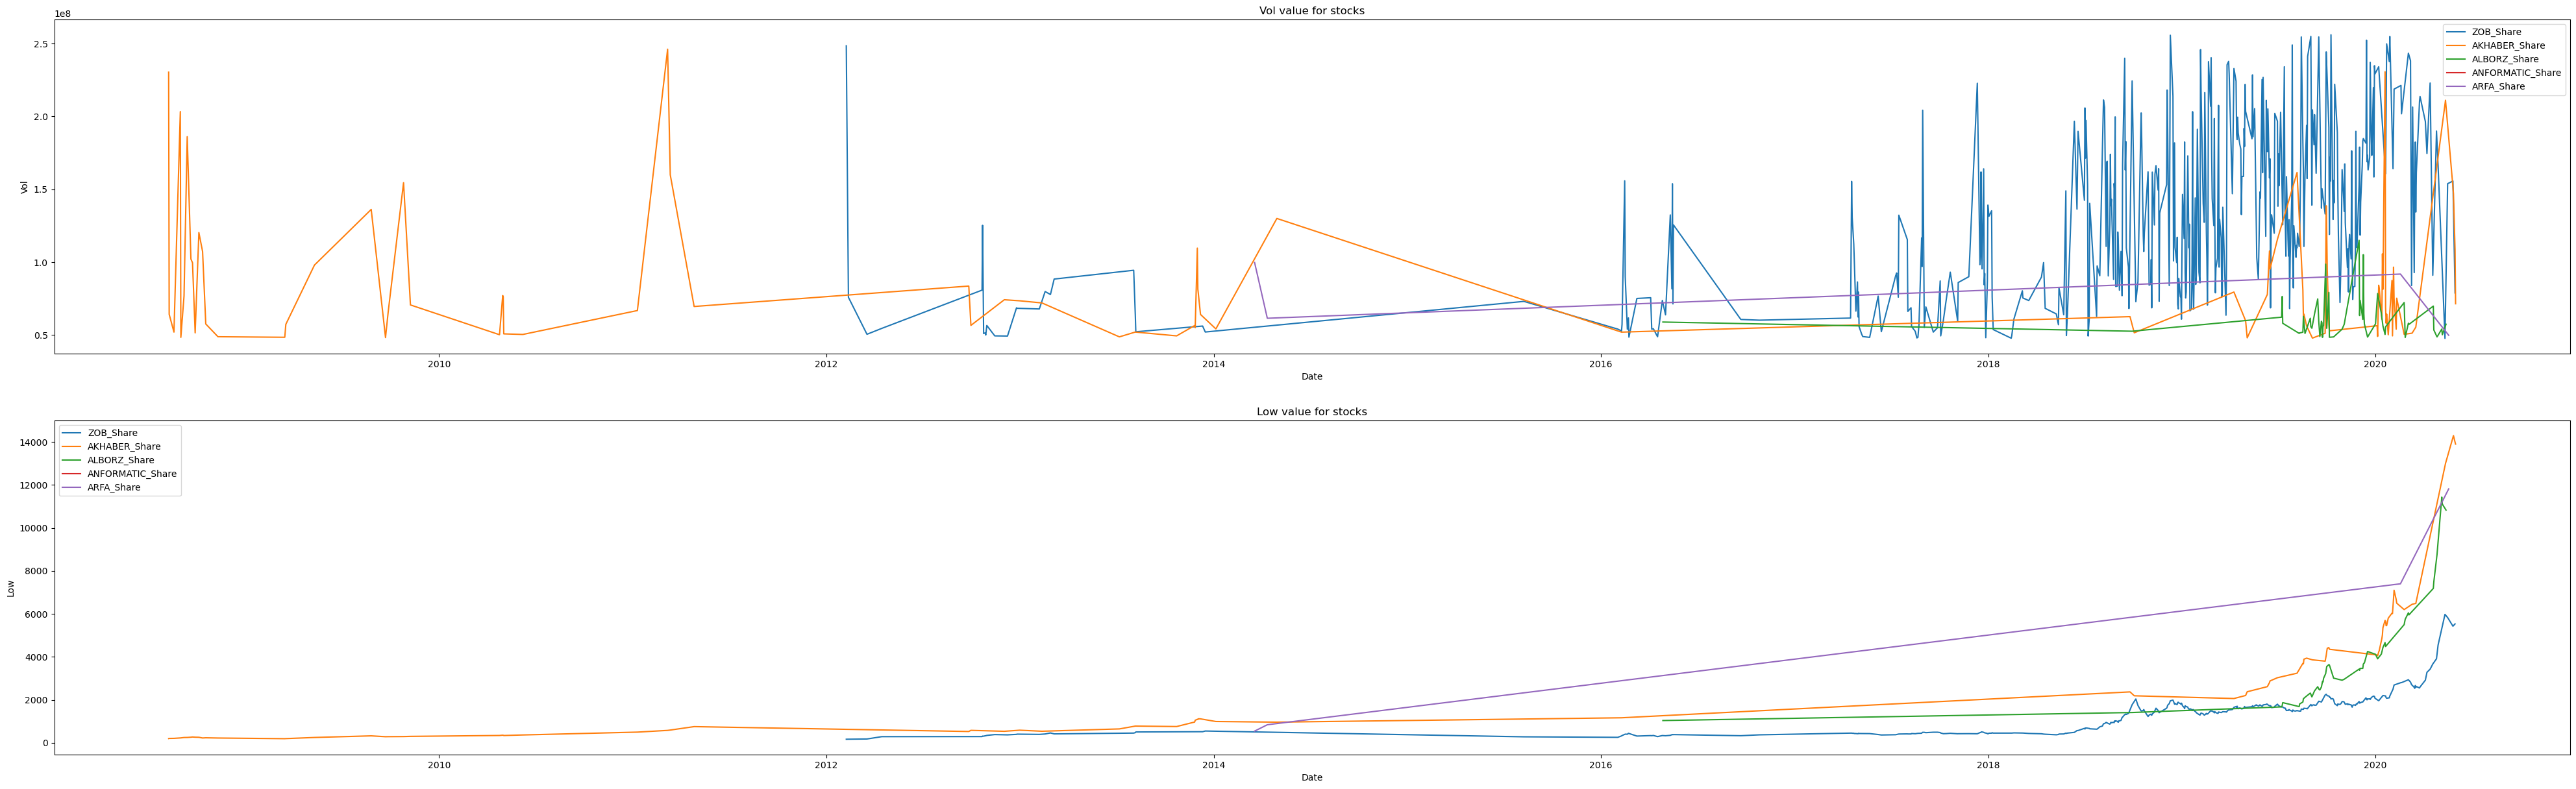

In [72]:
random_tricker=["ZOB_Share","AKHABER_Share", 'ALBORZ_Share', 'ANFORMATIC_Share', 'ARFA_Share']
plt.figure(figsize=(50,15),dpi=100)
plt.subplot(211)
for stocke in random_tricker:
    plt.plot(cluster_one[cluster_one.index==stocke].Date,cluster_one[cluster_one.index==stocke].Vol.values)
plt.legend(random_tricker)
plt.xlabel("Date")
plt.ylabel("Vol")
plt.title("Vol value for stocks");

plt.subplot(212)
for stocke in random_tricker:
    plt.plot(cluster_one[cluster_one.index==stocke].Date,cluster_one[cluster_one.index==stocke].Low.values)
plt.legend(random_tricker)
plt.xlabel("Date")
plt.ylabel("Low")
plt.title("Low value for stocks");



In [73]:
cluster_one

,Date,Open,High,Low,Close,Vol,Openint
Ticker,,,,,,,
AKHABER_Share,2008-08-09,199.63,199.63,199.63,199.63,230300000,1500
AKHABER_Share,2008-08-10,205.61,205.61,205.61,205.61,64168880,1545
AKHABER_Share,2008-08-19,215.20,220.25,208.67,212.27,51973731,1595
AKHABER_Share,2008-08-31,228.64,228.64,227.57,228.50,203253899,1717
AKHABER_Share,2008-09-01,232.90,235.29,229.84,234.89,48361658,1765
...,...,...,...,...,...,...,...
ZOB_Share,2020-04-28,4608.00,4608.00,4550.00,4608.00,166200246,4604
ZOB_Share,2020-05-11,5977.00,5977.00,5977.00,5977.00,47622758,5977
ZOB_Share,2020-05-16,6170.00,6180.00,5830.00,5830.00,153801337,5948


train test split

In [96]:
x=cluster_one.drop("Close",axis=1)
y=cluster_one["Close"]

In [97]:
xtrain=x.drop(["ZOB_Share","AKHABER_Share", 'ALBORZ_Share', 'ANFORMATIC_Share', 'ARFA_Share'],axis=0)
xtest=x[(x.index=="ZOB_Share")| (x.index=="AKHABER_Share")| (x.index=="ALBORZ_Share")| (x.index=="ANFORMATIC_Share")|(x.index=="ARFA_Share")]


ytrain=y.drop(["ZOB_Share","AKHABER_Share", 'ALBORZ_Share', 'ANFORMATIC_Share', 'ARFA_Share'],axis=0)
ytest=y[(y.index=="ZOB_Share")| (y.index=="AKHABER_Share")| (y.index=="ALBORZ_Share")| (y.index=="ANFORMATIC_Share")|(y.index=="ARFA_Share")]

In [98]:
index=list(zip(xtrain.index,xtrain.Date))
xtrain.index=pd.MultiIndex.from_tuples(index,names=("Ticker","Date"))
xtrain.drop(["Date"],axis=1, inplace=True)

index=list(zip(xtest.index,xtest.Date))
xtest.index=pd.MultiIndex.from_tuples(index,names=("Ticker","Date"))
xtest.drop(["Date"],axis=1, inplace=True)


In [99]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
ypred_lr=lr.predict(xtest)

ridge=Ridge(alpha=5)
ridge.fit(xtrain,ytrain)
ypred_ridge=ridge.predict(xtest)

lasso=Lasso(alpha=5)
lasso.fit(xtrain,ytrain)
ypred_lasso=ridge.predict(xtest)

dtr=DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=7)
dtr.fit(xtrain,ytrain)
ypred_dtr=dtr.predict(xtest)

In [100]:
list_model=[lr,ridge,lasso,dtr]
for model in list_model:
    score_train=model.score(xtrain,ytrain)
    score_test=model.score(xtest,ytest)
    print("score train is ",score_train,"score test is  ",score_test)

score train is  0.9989757934054538 score test is   0.9991003366214843
score train is  0.9989757934054538 score test is   0.999100336616628
score train is  0.9988393636772285 score test is   0.9988868570569087
score train is  0.9994487730475785 score test is   0.9989519825016675


In [79]:
xtest.reset_index(inplace=True)
xtest.set_index("Ticker",drop=True,inplace=True)
xtest.head()

,Date,Open,High,Low,Vol,Openint
Ticker,,,,,,
AKHABER_Share,2008-08-09,199.63,199.63,199.63,230300000,1500
AKHABER_Share,2008-08-10,205.61,205.61,205.61,64168880,1545
AKHABER_Share,2008-08-19,215.20,220.25,208.67,51973731,1595
AKHABER_Share,2008-08-31,228.64,228.64,227.57,203253899,1717
AKHABER_Share,2008-09-01,232.90,235.29,229.84,48361658,1765


In [80]:
xtest

,Date,Open,High,Low,Vol,Openint
Ticker,,,,,,
AKHABER_Share,2008-08-09,199.63,199.63,199.63,230300000,1500
AKHABER_Share,2008-08-10,205.61,205.61,205.61,64168880,1545
AKHABER_Share,2008-08-19,215.20,220.25,208.67,51973731,1595
AKHABER_Share,2008-08-31,228.64,228.64,227.57,203253899,1717
AKHABER_Share,2008-09-01,232.90,235.29,229.84,48361658,1765
...,...,...,...,...,...,...
ZOB_Share,2020-04-28,4608.00,4608.00,4550.00,166200246,4604
ZOB_Share,2020-05-11,5977.00,5977.00,5977.00,47622758,5977
ZOB_Share,2020-05-16,6170.00,6180.00,5830.00,153801337,5948


In [81]:
close=pd.DataFrame(ytest)
close["ypred_lr"]=ypred_lr.reshape(-1,1)
close["ypred_ridge"]=ypred_ridge.reshape(-1,1)
close["ypred_lasso"]=ypred_lasso.reshape(-1,1)
close["ypred_dtr"]=ypred_dtr.reshape(-1,1)


In [82]:
close["Date"]=xtest.Date
close

,Close,ypred_lr,ypred_ridge,ypred_lasso,ypred_dtr,Date
Ticker,,,,,,
AKHABER_Share,199.63,206.218932,206.218933,206.218933,231.435464,2008-08-09
AKHABER_Share,205.61,207.582093,207.582093,207.582093,231.435464,2008-08-10
AKHABER_Share,212.27,216.398150,216.398150,216.398150,231.435464,2008-08-19
AKHABER_Share,228.50,234.708719,234.708719,234.708719,231.435464,2008-08-31
AKHABER_Share,234.89,235.004944,235.004945,235.004945,231.435464,2008-09-01
...,...,...,...,...,...,...
ZOB_Share,4608.00,4587.996451,4587.996452,4587.996452,4583.481915,2020-04-28
ZOB_Share,5977.00,5989.350161,5989.350162,5989.350162,6069.024000,2020-05-11
ZOB_Share,5830.00,6004.016451,6004.016454,6004.016454,6069.024000,2020-05-16


In [83]:
close.index.value_counts()

ZOB_Share           439
AKHABER_Share        94
ALBORZ_Share         53
ARFA_Share            4
ANFORMATIC_Share      1
Name: Ticker, dtype: int64

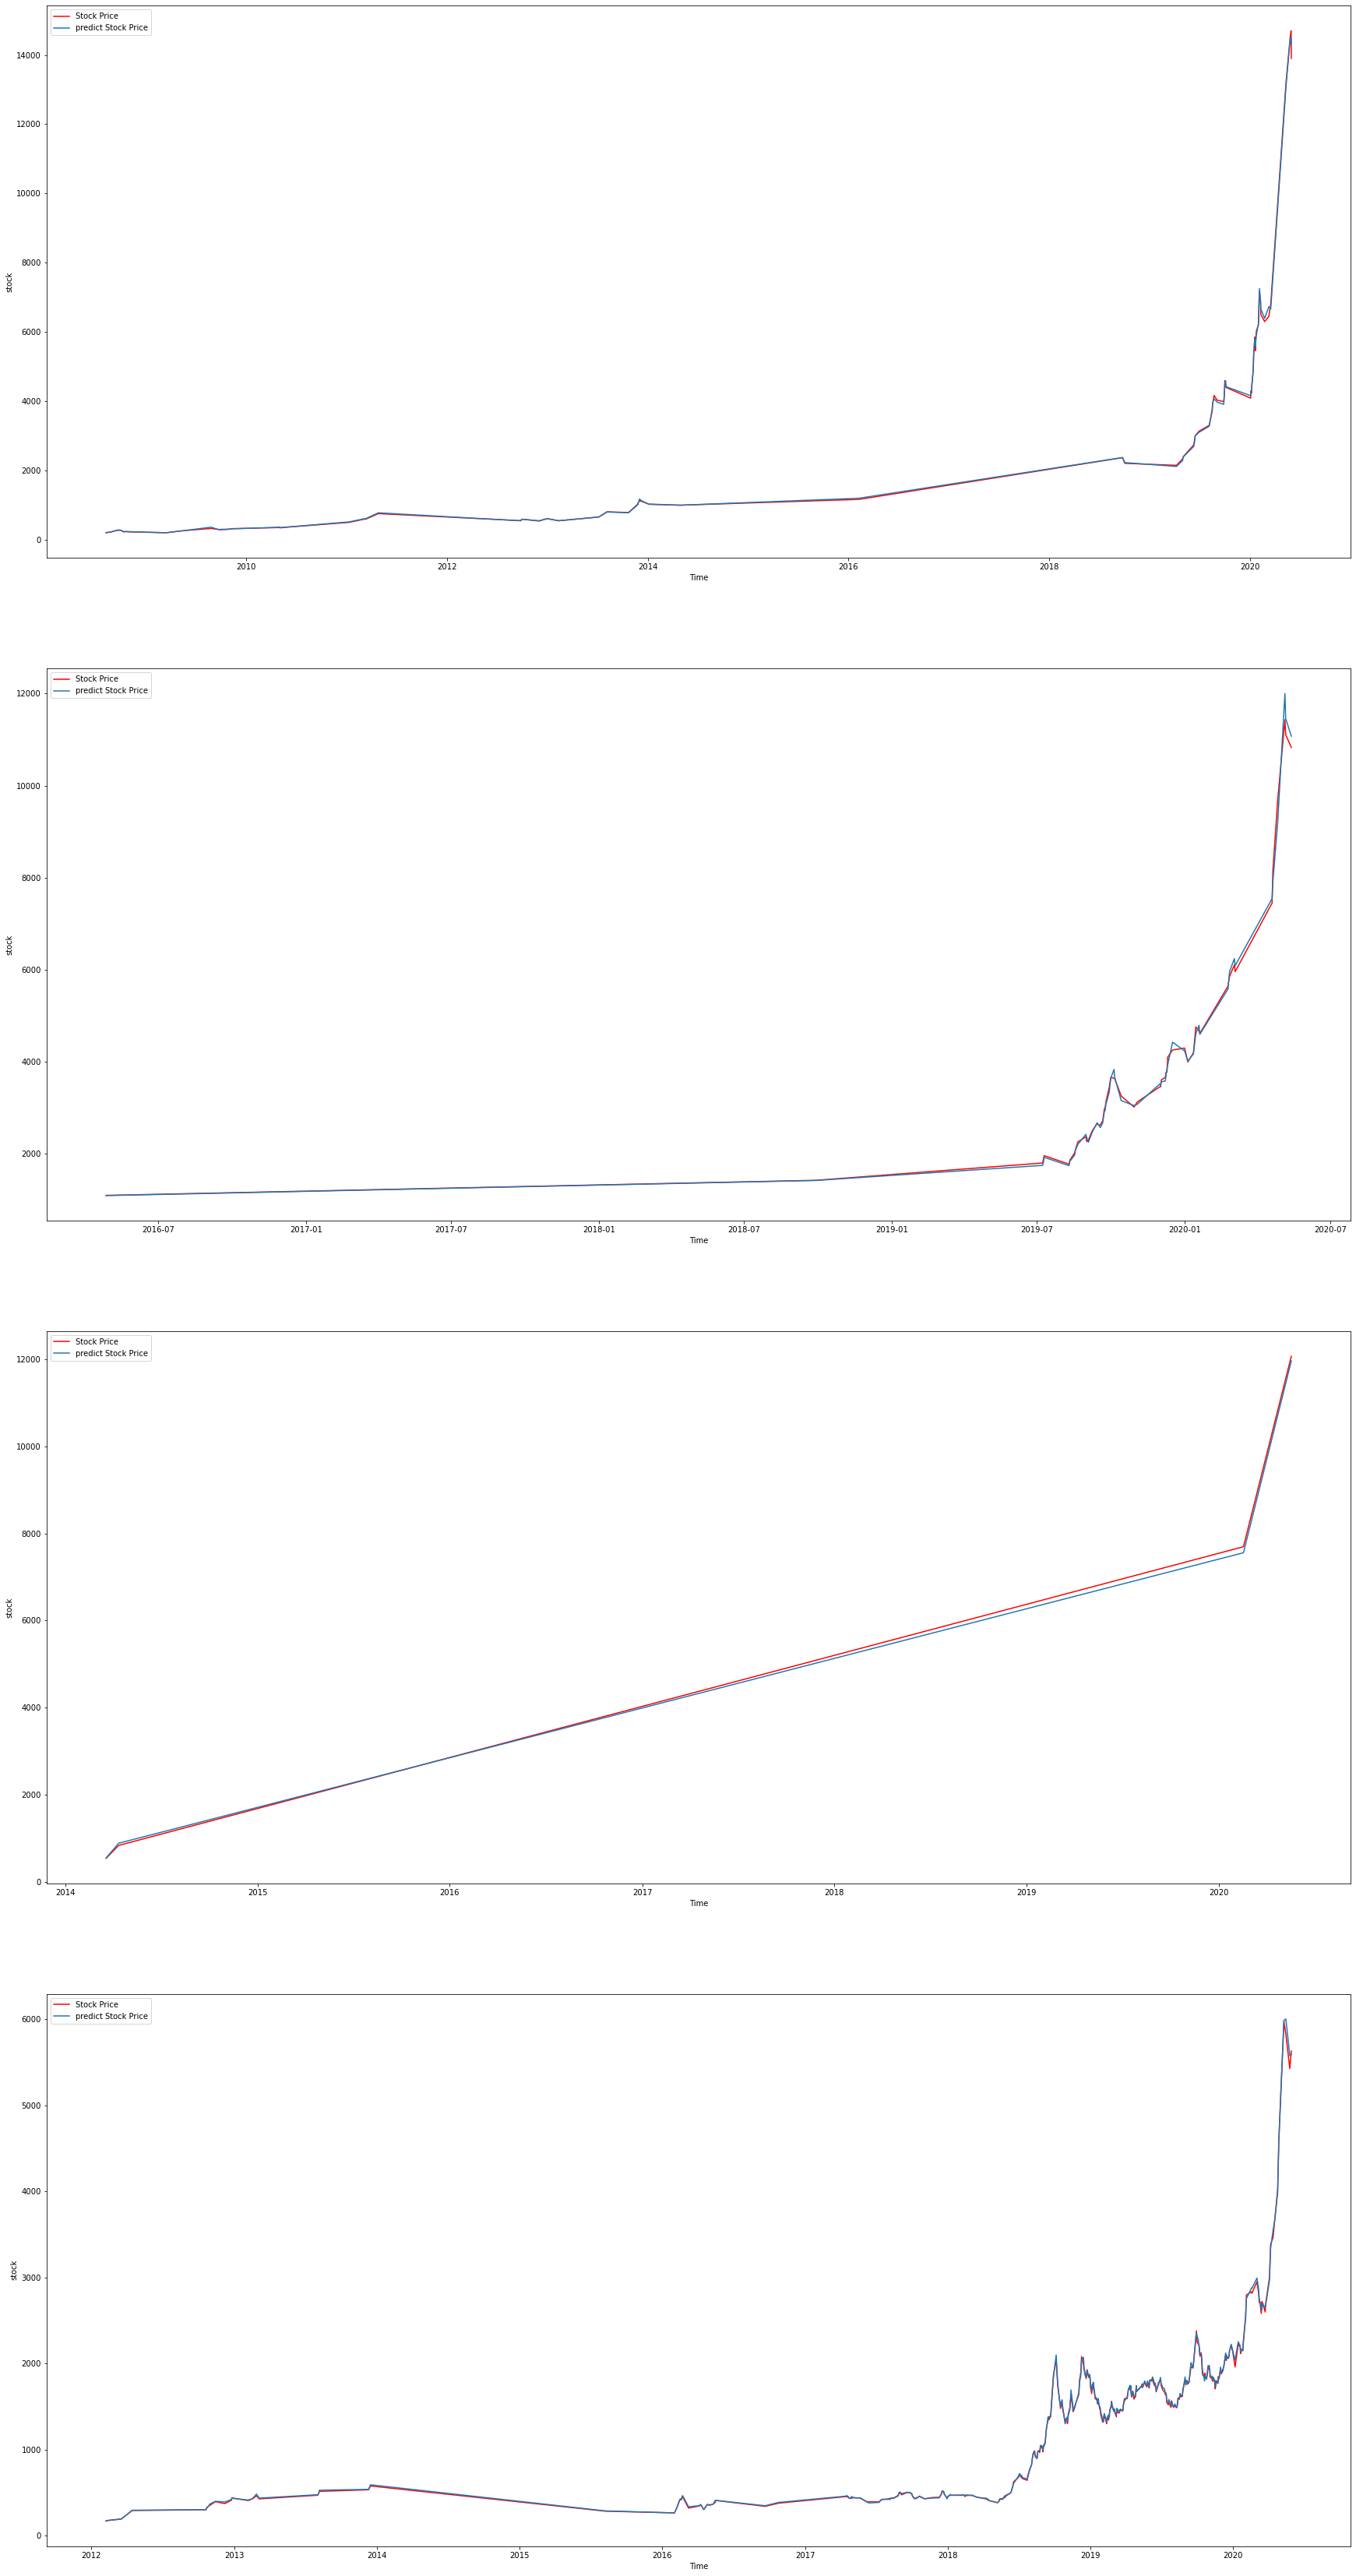

In [104]:
list_unique=['AKHABER_Share', 'ALBORZ_Share','ARFA_Share','ZOB_Share']
plt.figure(figsize=(30,60))
i=1
for stock in list_unique:
    plt.subplot(4,1,i)
    plt.plot(close[close.index==stock].Date,close[close.index==stock].Close,label='Stock Price',color="red")
    plt.plot(close[close.index==stock].Date,close[close.index==stock].ypred_lr,label='predict Stock Price')
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('stock')
    i+=1
plt.savefig("D://project//bource//linearpic.png")   

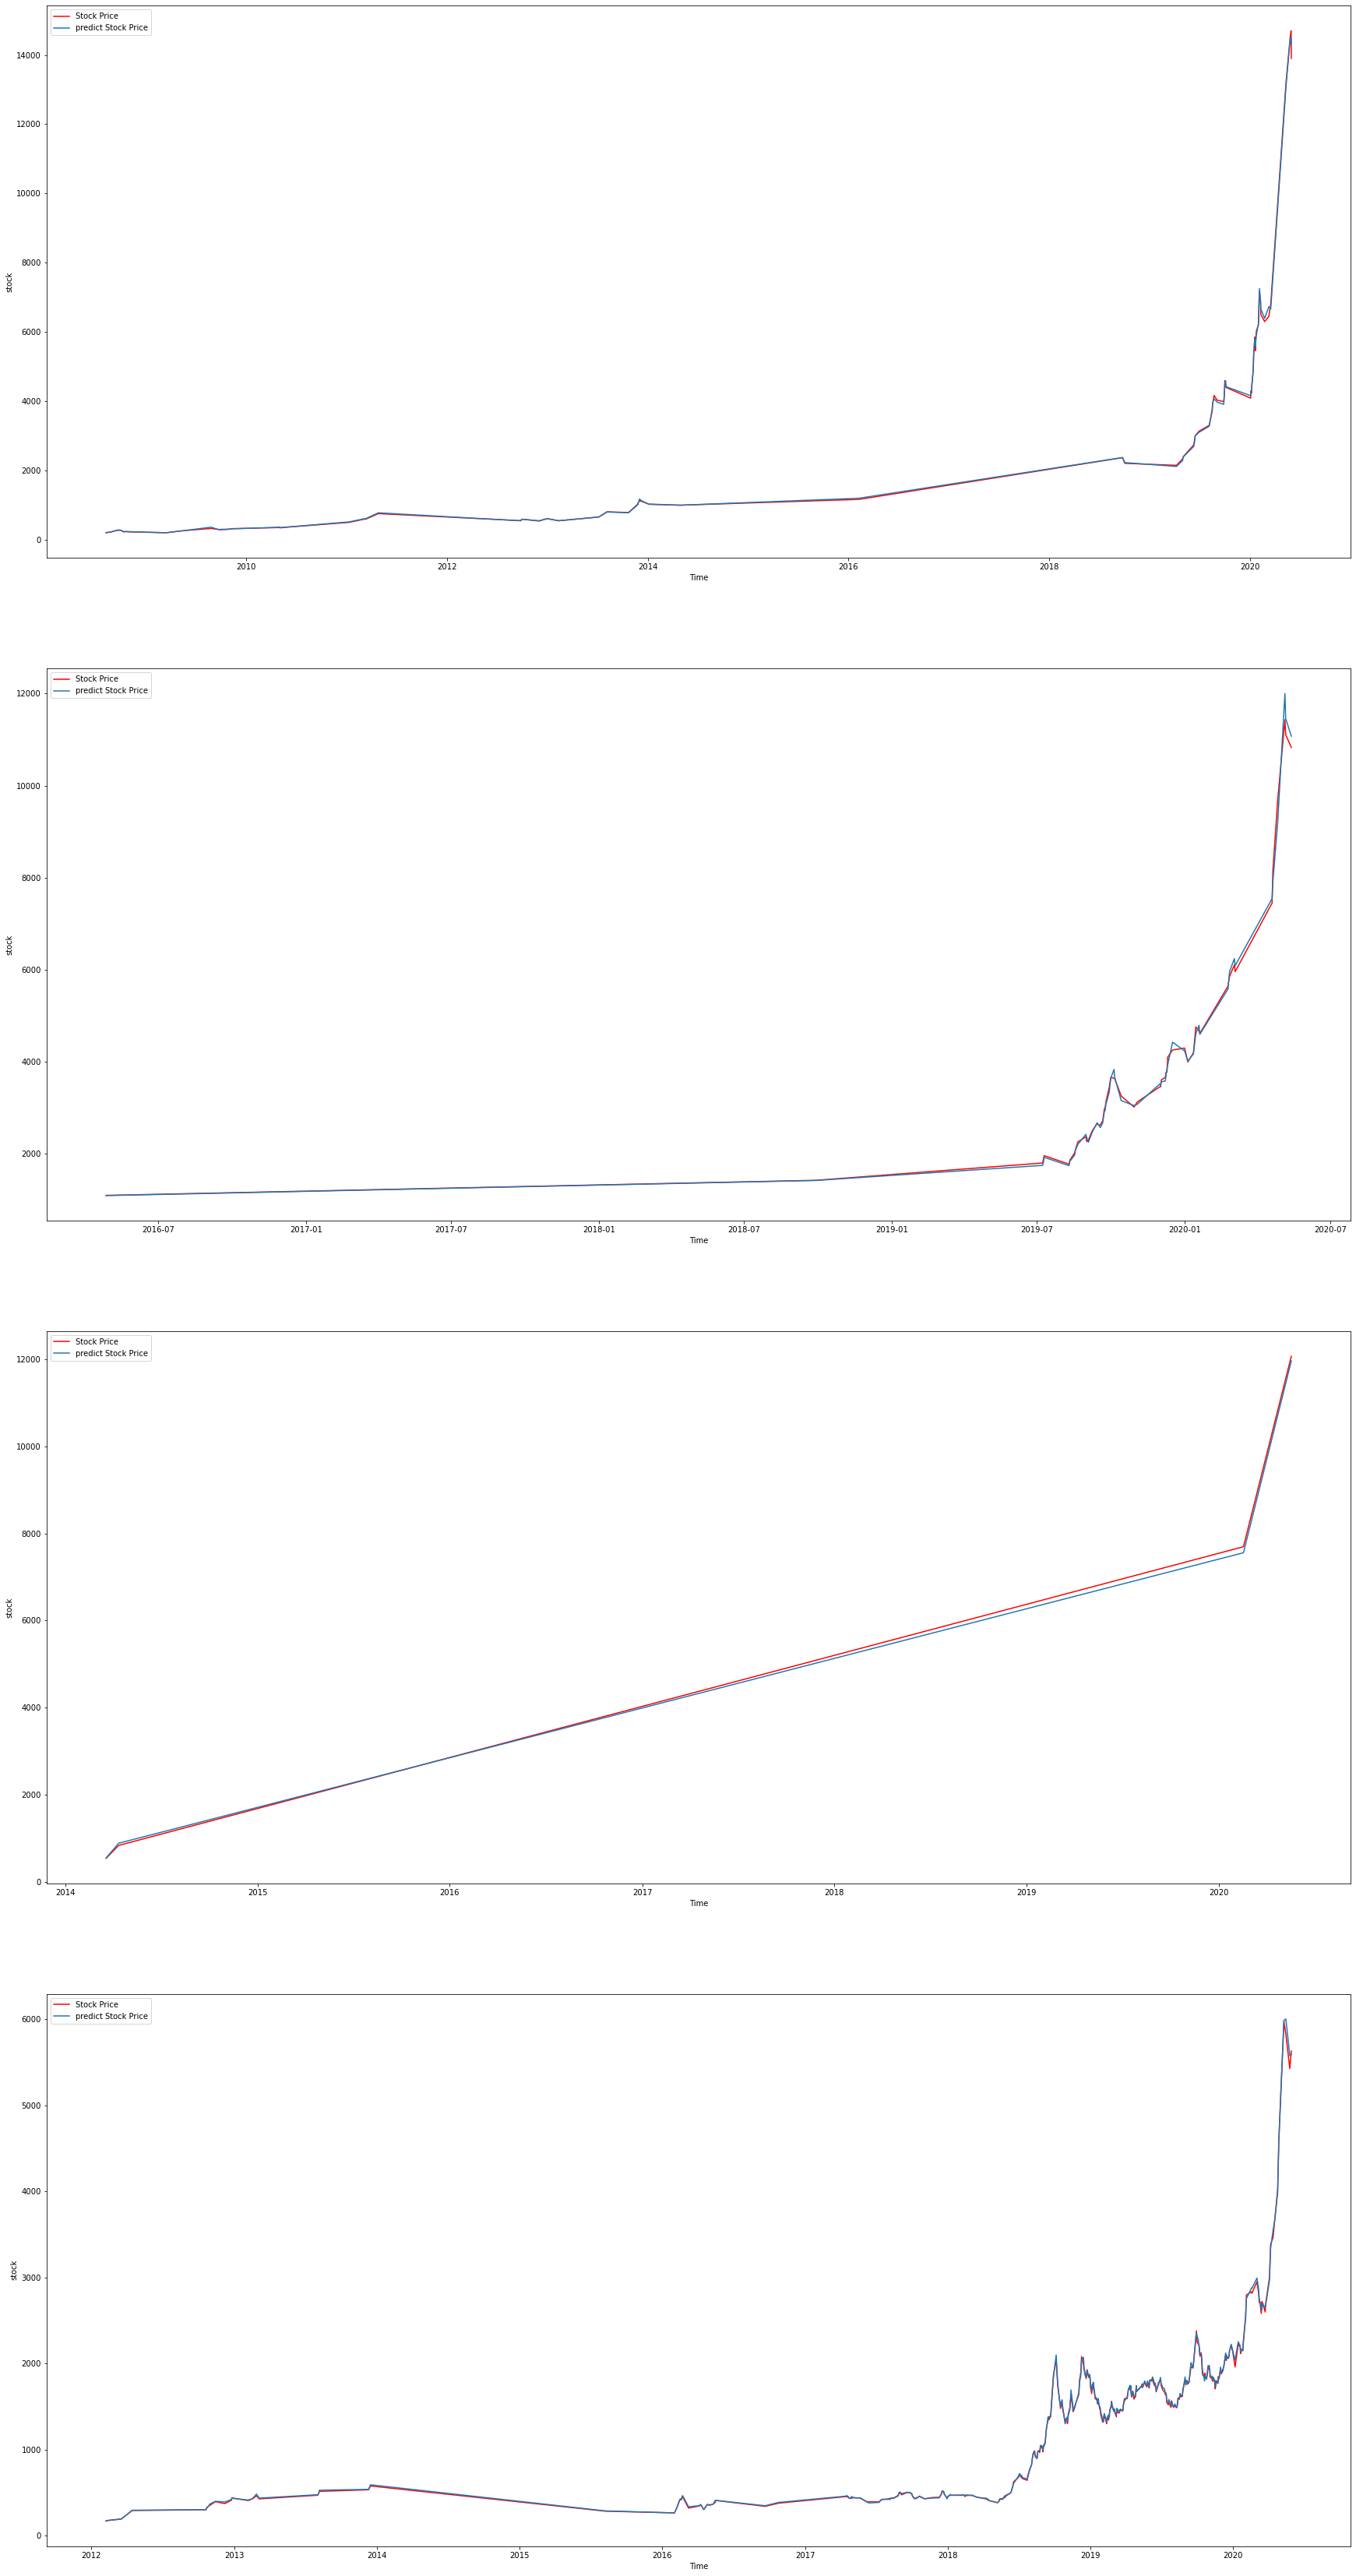

In [91]:
list_unique=['AKHABER_Share', 'ALBORZ_Share','ARFA_Share','ZOB_Share']
plt.figure(figsize=(30,60))
i=1
for stock in list_unique:
    plt.subplot(4,1,i)
    plt.plot(close[close.index==stock].Date,close[close.index==stock].Close,label='Stock Price',color="red")
    plt.plot(close[close.index==stock].Date,close[close.index==stock].ypred_ridge,label='predict Stock Price')
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('stock')
    i+=1
plt.savefig("D://project//bource//ridge.png")    

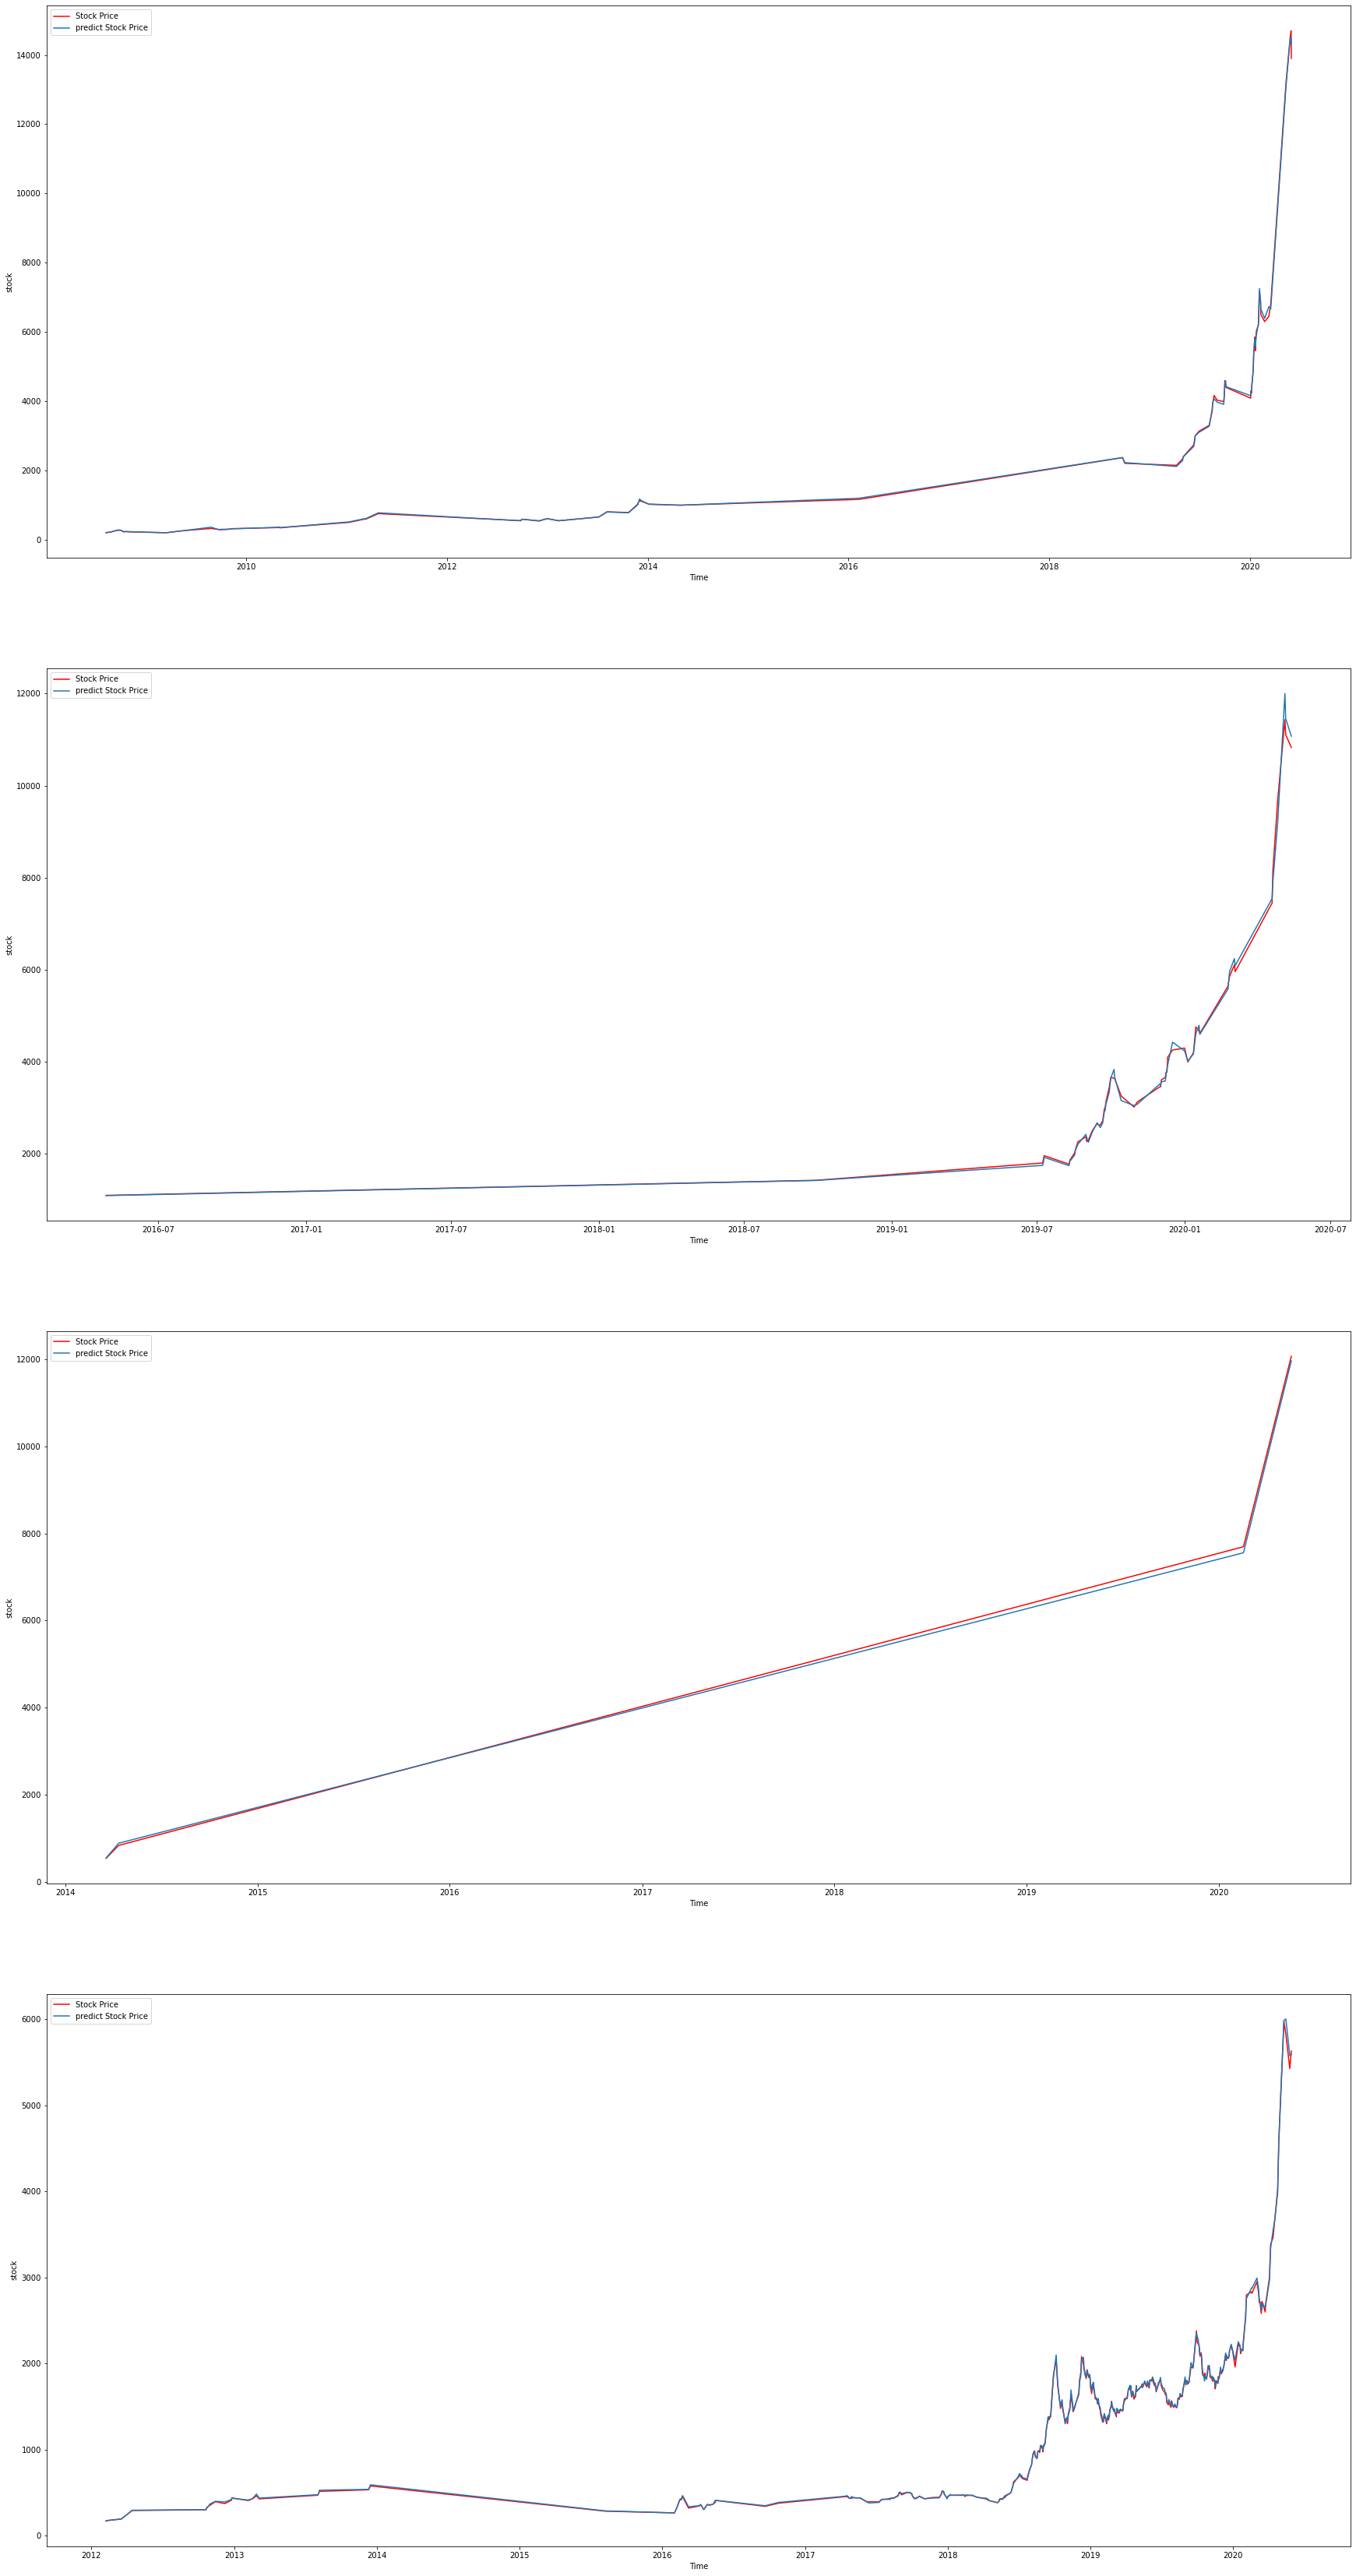

In [90]:
list_unique=['AKHABER_Share', 'ALBORZ_Share','ARFA_Share','ZOB_Share']
plt.figure(figsize=(30,60))
i=1
for stock in list_unique:
    plt.subplot(4,1,i)
    plt.plot(close[close.index==stock].Date,close[close.index==stock].Close,label='Stock Price',color="red")
    plt.plot(close[close.index==stock].Date,close[close.index==stock].ypred_lasso,label='predict Stock Price')
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('stock')
    i+=1
plt.savefig("D://project//bource//lasso.png")       

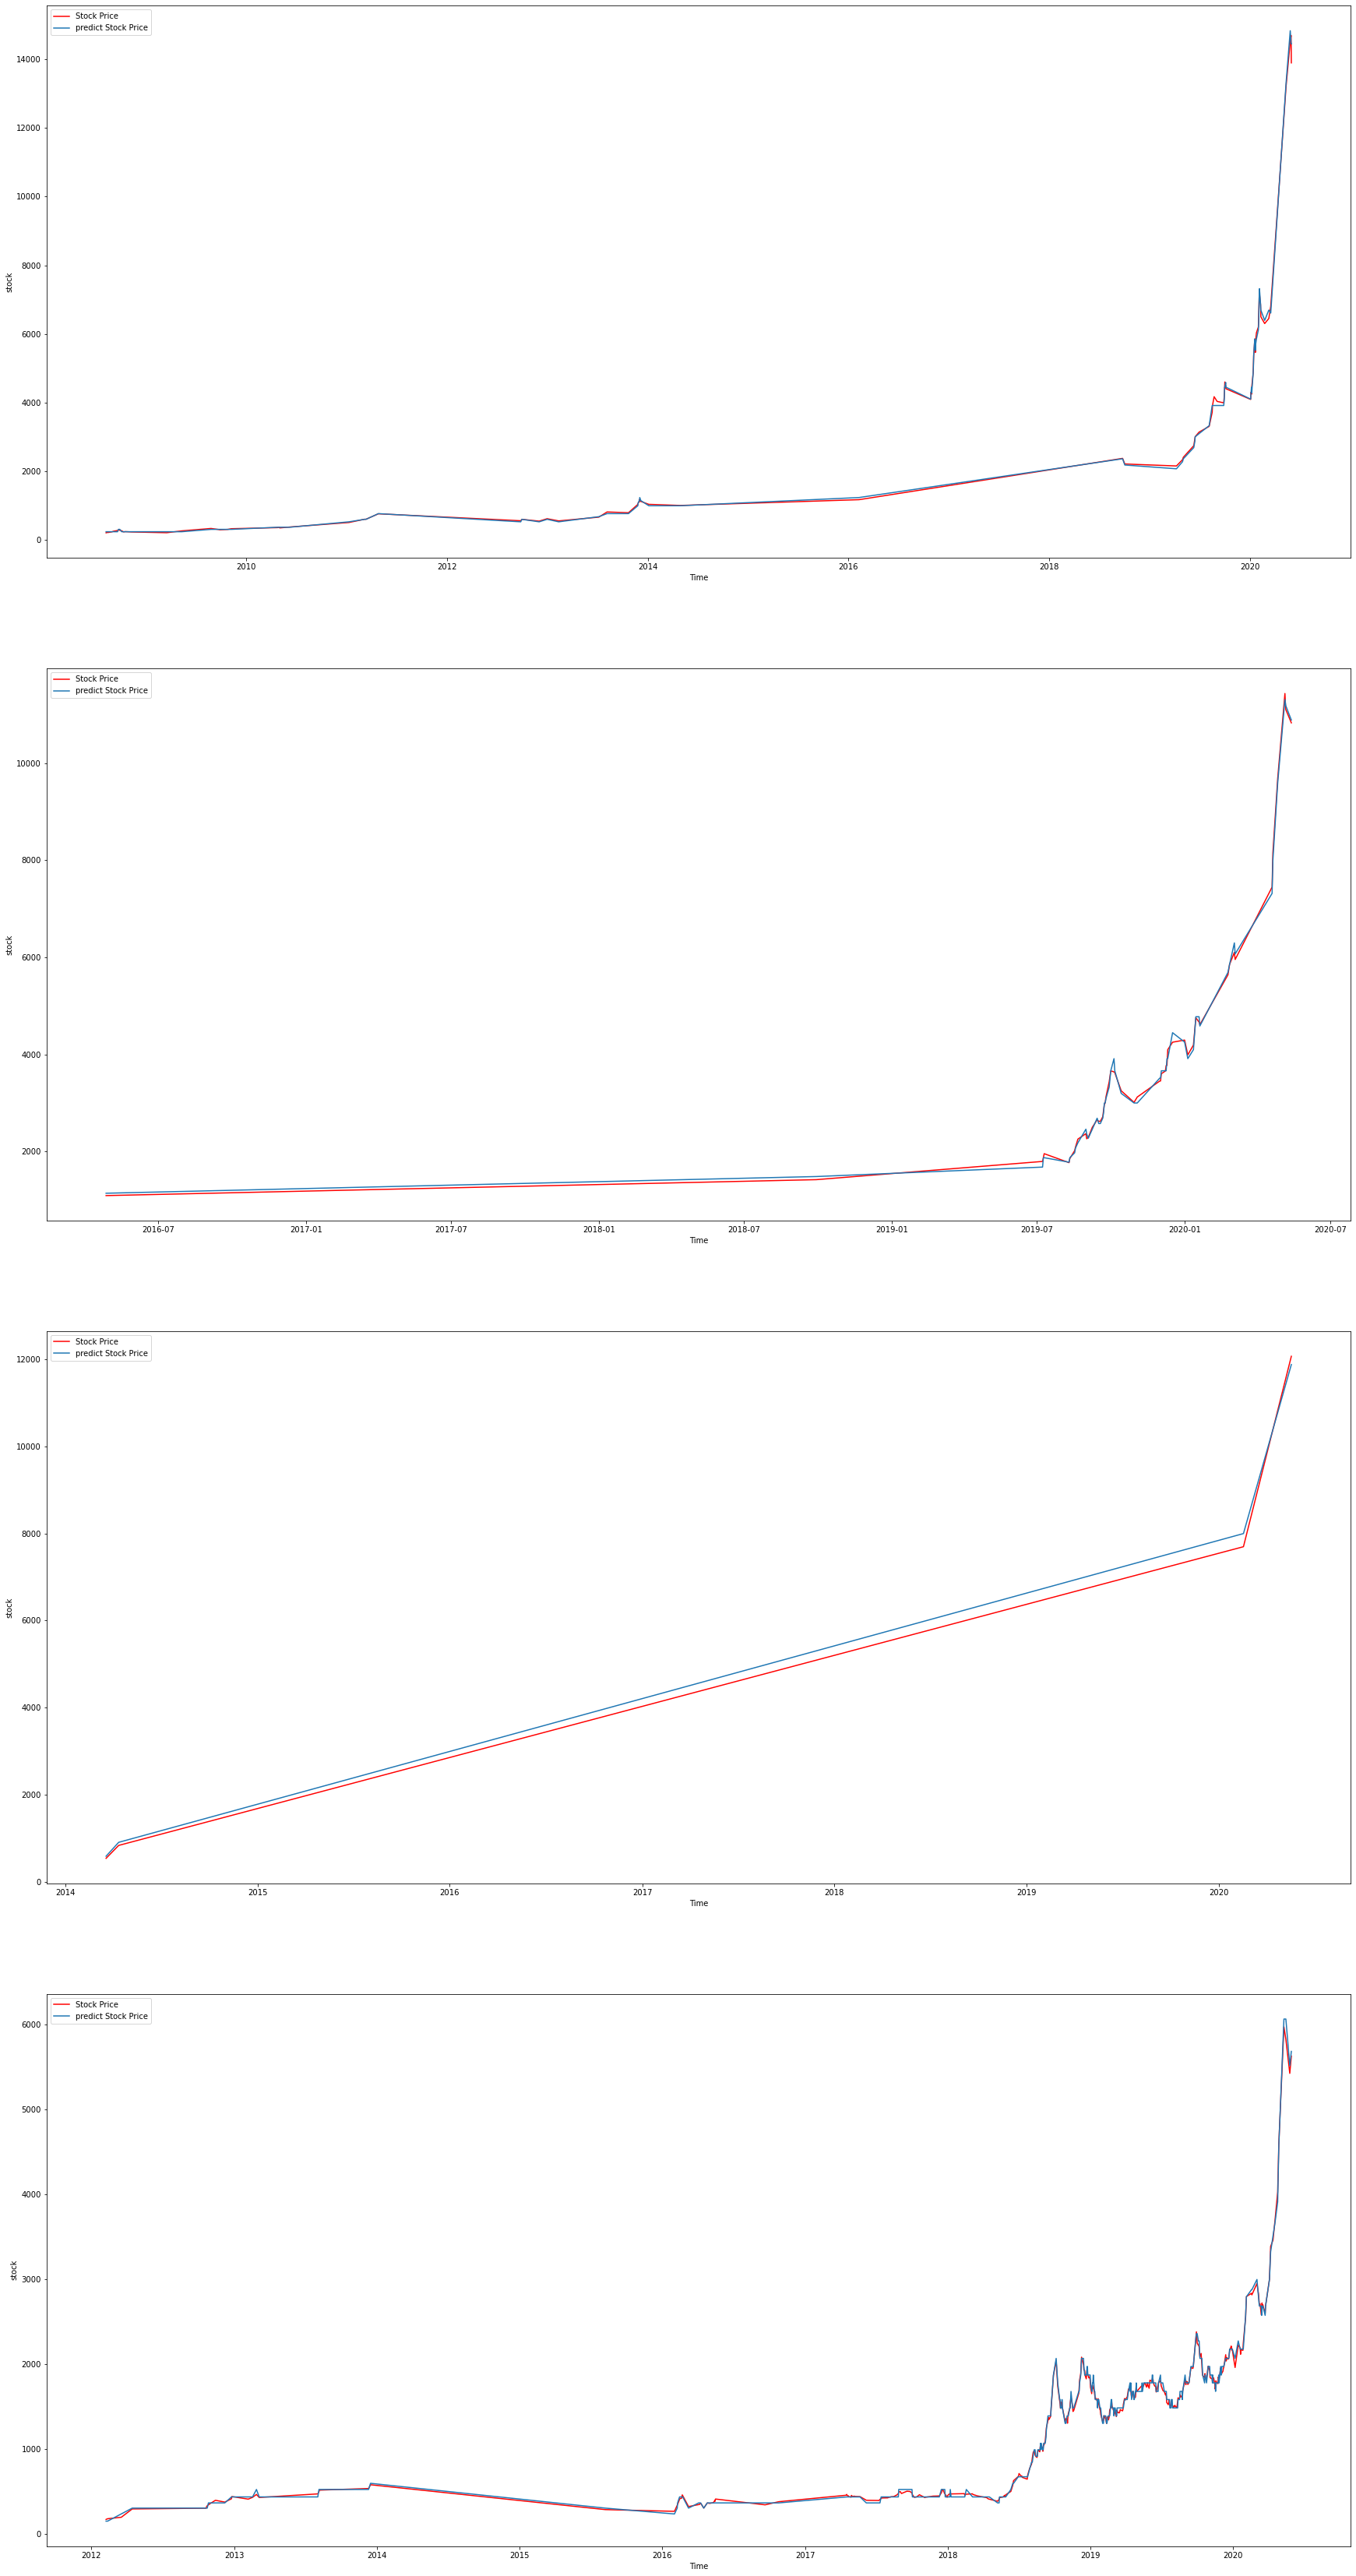

In [92]:
list_unique=['AKHABER_Share', 'ALBORZ_Share','ARFA_Share','ZOB_Share']
plt.figure(figsize=(30,60))
i=1
for stock in list_unique:
    plt.subplot(4,1,i)
    plt.plot(close[close.index==stock].Date,close[close.index==stock].Close,label='Stock Price',color="red")
    plt.plot(close[close.index==stock].Date,close[close.index==stock].ypred_dtr,label='predict Stock Price')
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('stock')
    i+=1
plt.savefig("D://project//bource//dtr.png")       

In [103]:
print("mse for linear regression::  ",mean_squared_error(close.Close,close.ypred_lr))
print("mse for ridgr regression::  ",mean_squared_error(close.Close,close.ypred_ridge))
print("mse for lasso regression::  ",mean_squared_error(close.Close,close.ypred_lasso))
print("mse for Decision tree regression::  ",mean_squared_error(close.Close,close.ypred_dtr))

mse for linear regression::   3338.3467645110572
mse for ridgr regression::   3338.346782531306
mse for lasso regression::   3338.346782531306
mse for Decision tree regression::   3888.8387682085886
